Main reference:

https://medium.com/swlh/natural-language-processing-nlp-analysis-with-amazon-review-data-part-i-data-engineering-6573b782e4dc
https://melaniesoek0120.medium.com/natural-language-processing-nlp-amazon-review-data-part-ii-eda-data-preprocessing-and-model-3866dcbdbb77 


## Read and DropNan

In [1]:
import pandas as pd
import numpy as np


df = pd.read_csv(r"C:\Users\Lim Jia Hui\Desktop\songsdata.csv")
print(len(df.reviewText))
print(df.head())
nanlist = []
for text in range(len(df.reviewText)):
    if type(df.reviewText[text])!= str:
        nanlist.append(int(text))
print(nanlist)
df.drop(index=nanlist, axis=0,inplace=True)
df.reset_index(inplace=True)


93907
   overall                                         reviewText
0        5  This is awesome to listen to, A must-have for ...
1        5                                               bien
2        5  It was great to hear the old stuff again and I...
3        4  well best of's are a bit poison normally but t...
4        5  What can I say? This is Casting Crowns!!!This ...
[2165, 54714]


## Change Labels to Binary

In [2]:
for idx in range(df.shape[0]):
    if df.loc[idx,'overall'] <= 3:
        df.loc[idx,'overall'] = 0
    if df.loc[idx,'overall'] > 3:
        df.loc[idx,'overall'] = 1
print(df['overall'].head())

0    1
1    1
2    1
3    1
4    1
Name: overall, dtype: int64


# Feature Extraction

## Stopwords

In [3]:
from nltk.corpus import stopwords
import string

sw_list = stopwords.words('english')
sw_list += list(string.punctuation)
sw_list += ["''", '""', '...', '``', '’', '“', '’', '”', '‘', '‘',"'", '©','said',"'s", "also",'one',"n't",'com', '-', '–', '—', '_',"/",'..']

## Tokenizer, Stemmer, and Lemmatizer

In [4]:
import nltk
from nltk.stem import PorterStemmer as ps
from nltk.stem.wordnet import WordNetLemmatizer
import re

def Numbers_remover(text):
    numless_data = re.sub(r'\d+', '', text)
    return numless_data

def Tokenizer(data):
    tokens = nltk.word_tokenize(data)
    tokenized_data= []
    for i in tokens:
        if i.lower() not in sw_list:
            tokenized_data.append(i.lower())
    return tokenized_data

def Stemmer(data2):
    stemmed_data =[]
    for j in data2:
        stemmed_data.append(ps().stem(j))
    return stemmed_data

def Lemmatizer(data3):
    lemmatized_data = []
    for k in data3:
        lemmatized_data.append(WordNetLemmatizer().lemmatize(k, pos='v'))
    return lemmatized_data



lemmatized_reviews = list(map(Lemmatizer,(map(Stemmer, (map(Tokenizer,map(Numbers_remover, df['reviewText'])))))))

print(lemmatized_reviews[:5])



[['awesom', 'listen', 'must-hav', 'slayer', 'fan', 'sadli', 'need', 'tripl', 'disc', 'set', 'mani', 'hit'], ['bien'], ['great', 'hear', 'old', 'stuff', 'like', 'new', 'stuff', 'recommend', 'slayer', 'fan'], ['well', 'best', 'bite', 'poison', 'normal', 'bad', 'pretti', 'good', "'d", 'put', 'hell', 'await', 'reign', 'blood', 'south', 'season', 'divin', 'coupl', 'musica', 'track', 'everyth', 'god', 'hate', '-at', 'point', 'best', 'mean', 'everi', 'cd', 'mainli', 'bad', 'dose', 'put', 'great', 'track', 'live', 'show', 'play', 'much', 'like', 'skeleton', 'societi', 'sex', 'murder', 'art', 'gemini', 'rare', 'track', 'final', 'six', 'bonu', 'track', 'christ', 'illus', 'mysteri', 'cover', 'song', 'unditstput', 'attitud', 'cd', 'would', 'greatest', 'hit', 'collect', 'know', 'put', 'coupl', 'live', 'track', 'too.al', 'could', 'much', 'wors', 'great', 'car'], ['say', 'cast', 'crown', 'good', 'bless', 'fill', 'cd']]


## Post Lemmatized Nan Drops

In [5]:
nanlist2 = []
for word in range(len(lemmatized_reviews)):
    if len(lemmatized_reviews[word]) == 0:
        nanlist2.append(word)
print(nanlist2)
print(len(nanlist2))
print(len(lemmatized_reviews))
for nan in nanlist2:
    lemmatized_reviews.remove([])
print(len(lemmatized_reviews))



[293, 1792, 1942, 2035, 2578, 2652, 3560, 3857, 5025, 5122, 5568, 6552, 6571, 7846, 8136, 9071, 9464, 10069, 11448, 11803, 12422, 12825, 13354, 14195, 14932, 16557, 18283, 28588, 30450, 30547, 30973, 32356, 32601, 33455, 35223, 35698, 35703, 37831, 37910, 39228, 40752, 42037, 43383, 44559, 45716, 48627, 50097, 52295, 52380, 52690, 54104, 55256, 56502, 59297, 59520, 60623, 60805, 61150, 61165, 62528, 65639, 66416, 68010, 69224, 69310, 70043, 70091, 70892, 71015, 71677, 72711, 73298, 73509, 73897, 75240, 75327, 75406, 76099, 76477, 77468, 77836, 77867, 80751, 81848, 82071, 82732, 82843, 85562, 86105, 86398, 88067, 88161, 88665, 89174, 89212, 90531, 90811, 90973, 91022, 91086, 91136, 91580, 92817]
103
93905
93802


### Removal from original df

In [6]:
df.drop(index=nanlist2, axis=0,inplace=True)
df.reset_index(inplace=True)


## Train-Test and Train-Val-Test Split

In [7]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(pd.DataFrame({'processed_reviews':lemmatized_reviews}), df['overall'].to_frame(name='overall'), test_size=0.2, random_state=0)

x_val_train, x_val_test, y_val_train, y_val_test = train_test_split(x_train,y_train,test_size=0.2,stratify=y_train, random_state=0)

print("Train set features array shape: {}".format(x_train.shape))
print("Test set features array shape: {}".format(x_test.shape))
print("Train set labels array shape: {}".format(x_train.shape))
print("Test set labels array shape: {}".format(x_test.shape))
print("Validation Train set features array shape: {}".format(x_val_train.shape))
print("Validation Test set features array shape: {}".format(x_val_test.shape))
print("Validation Train set labels array shape: {}".format(y_val_train.shape))
print("Validation Test set labels array shape: {}".format(y_val_test.shape))



Train set features array shape: (75041, 1)
Test set features array shape: (18761, 1)
Train set labels array shape: (75041, 1)
Test set labels array shape: (18761, 1)
Validation Train set features array shape: (60032, 1)
Validation Test set features array shape: (15009, 1)
Validation Train set labels array shape: (60032, 1)
Validation Test set labels array shape: (15009, 1)


In [8]:
print(pd.DataFrame({'label_freq' : y_train.value_counts()}).reset_index().sort_values(by='overall',ascending=True))

   overall  label_freq
1        0        5877
0        1       69164


## Visualising Label Imbalance

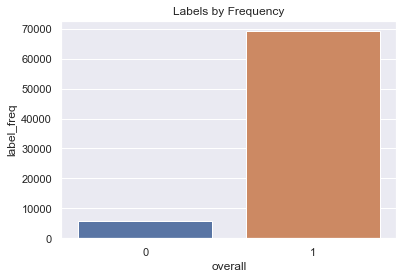

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()

label_freq_plot = pd.DataFrame({'label_freq' : y_train.value_counts()}).reset_index().sort_values(by='overall',ascending=True)

sns.barplot(x=label_freq_plot['overall'],y=label_freq_plot['label_freq']).set_title('Labels by Frequency')

plt.show()

## Resampling


In [10]:
# optional "manual" resampler with sklearn.utils.resample

# from sklearn.utils import resample

# xy_train = pd.concat([x_train,y_train], axis=1)
# xy_val_train = pd.concat([x_val_train,y_val_train], axis=1)

# def resampling(minority):
#    resampled_minority = resample(minority, replace=True, n_samples= len(xy_train[xy_train.overall==5]), random_state=0)
#    return resampled_minority

# resampled_xy_train = xy_train[xy_train.overall==5]
# resampled_xy_val_train = xy_val_train[xy_val_train.overall==5]

# for i in range (1,5):
#    resampled_xy_train = pd.concat([resampled_xy_train,resampling(xy_train[xy_train.overall==i])])

# for i in range (1,5):
#    resampled_xy_val_train = pd.concat([resampled_xy_val_train,resampling(xy_val_train[xy_val_train.overall==i])])

# resampled_shuffled_xy_train = resampled_xy_train.sample(frac=1)
# x_train = resampled_shuffled_xy_train['processed_reviews'].to_frame()
# y_train = resampled_shuffled_xy_train['overall'].to_frame()

# resampled_shuffled_xy_val_train = resampled_xy_val_train.sample(frac=1)
# x_val_train = resampled_shuffled_xy_val_train['processed_reviews'].to_frame()
# y_val_train = resampled_shuffled_xy_val_train['overall'].to_frame()

In [11]:
from sklearn.utils import resample
from imblearn.over_sampling import RandomOverSampler

x_train, y_train = RandomOverSampler(random_state=0).fit_resample(x_train,y_train)

x_val_train, y_val_train = RandomOverSampler(random_state=0).fit_resample(x_val_train,y_val_train)



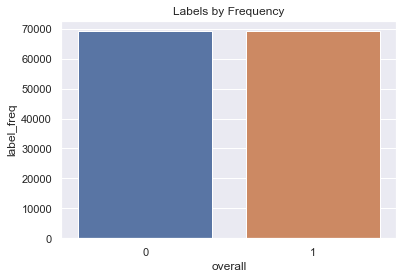

In [12]:
sns.set_theme()

label_freq_plot = pd.DataFrame({'label_freq' : y_train.value_counts()}).reset_index().sort_values(by='overall',ascending=True)

sns.barplot(x=label_freq_plot['overall'],y=label_freq_plot['label_freq']).set_title('Labels by Frequency')

plt.show()

## Tf-Idf Vectorization

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

def dummy_token_and_pre(doc):
    return doc

tfidf = TfidfVectorizer(analyzer='word', tokenizer=dummy_token_and_pre, preprocessor=dummy_token_and_pre, token_pattern=None)

tfidf_val = TfidfVectorizer(analyzer='word', tokenizer=dummy_token_and_pre, preprocessor=dummy_token_and_pre, token_pattern=None)

x_trainvec = tfidf.fit_transform(x_train.processed_reviews).sorted_indices()
x_testvec = tfidf.transform(x_test.processed_reviews).sorted_indices()

x_val_trainvec = tfidf_val.fit_transform(x_val_train.processed_reviews).sorted_indices()
x_val_testvec = tfidf_val.transform(x_val_test.processed_reviews).sorted_indices()

## Stacking

### TF MLP

In [14]:
#pseudocode for mlp hyperparam tuning

#obj()
    #param = suggest()

    #model = model()

    #for epochs in range()
    #            agg_f1 = []

    #    for train_index, val_index in StratifiedKFold(n_splits=5).split(x_trainvec,y_train): 

    #        x_trainvec_resd, y_train_resd = RandomOverSampler(random_state=0).fit_resample(x_trainvec.iloc[train_index], y_train.iloc[train_index])    

    #        model.fit(x=x_trainvec_resd, y=y_train_resd, epochs =(5^(rung)), verbose=0, batch_size= 100, random_state=0, callbacks=es)

    #        agg_f1.append(f1_score(y_pred=model.predict(pd.DataFrame.sparse.from_spmatrix(x_trainvec).iloc[val_index]), y_true=y_train.iloc[val_index].to_numpy().ravel(), average = 'macro'))

    #    intermediate_value = statistics.mean(agg_f1)



#rant: The challenge in implementing cross-validation for a tf model is the use of a tf model with (a lack of)sklearn functionalities
#      In this case, tf models have some hyperparams that need do be defined in .fit(), which clashes with sklearn functionalities 
#      as some sklearn functions have .fit() implicit in them. The important one here is cross_val_score(). Without this, one has to
#      resort to manually implementing the (stratified)cross_val function. This is a further issue when the data is imbalanced.
#      From googling it seems that the way to treat imbalanced data in cross-validation is to oversample the training folds
#      for each cross-validation split. This can normally be combined into a sklearn/imblearn pipeline and then passed to the
#      cross-validation function as seen in the random forest model. However, as mentioned this is a tf model with sklearn functionalities,
#      hence one has to implement this part manually as well. This is a bigger conundrum that one might initially expect.
#      As the method used is usually to slice out the training part of each cross-validation fold and then apply an oversampling function.
#      However, slicing a sparse matrix with a 1d np array as input is something that googling doesnt show how to do.
#      Now, you might think of transforming the sparse matrix into a pd df so that you could slice it with say iloc, but  
#      because of an unknown reason while the oversampling function as mentioned previously is supposed to be able to take 
#      both pandas df and sparse matrix as inputs, the pandas df version of a sparse matrix is not a valid input. This is vile shenanigans 
#      and I am utterly repulsed by it. Yet, given all this there is still the option of moving the tf-idf vectorization into the 
#      cross-validation part so that the sparse matrix is only made post oversampling, or making your own cross-validation
#      function with libraries using an updated version of pandas/scipy(both of which I will NOT do).
#  

#      Now one might be wondering why one should use a tf model anyways given its imperfect compatabiities(at least in cross-validation).  
#      The answer is GPU. Sklearn does not offer GPU support for training its models. The increase in training speed given GPU support is  
#      highly considerable, especially if you can parellelize your processes. However, given that cross-validation is such a pain to implement, 
#      one might ask whether its still worth using even  if you have to redo the tf-idf vectorization every split for every epoch 
#      for every set of hyperparameters. The answer is something I do not know and will not attempt to know. Hence, the question is then
#      rephrased into whether the extra speed from using the GPU is worth the decrease in samples used for the training set as some samples need
#      to be separated into a validation set. Admittedly, I personally  answered this question rather arbitrarily and perhaps personally biased to the
#      supposed superiority of Optuna in flexibility and (maybe)speed over sklearn hyperparameter tuning.
#      Hence, I can't exactly justify my choice here, and what I do here is best treated just as a proof of concept from a tired individual.
            


In [15]:
import tensorflow as tf
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.callbacks import EarlyStopping
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.optimizer_v2.gradient_descent import SGD
from scikeras.wrappers import KerasClassifier
from imblearn.over_sampling import RandomOverSampler
import optuna
from optuna.samplers import TPESampler
from optuna.pruners import SuccessiveHalvingPruner
from optuna.integration import TFKerasPruningCallback
from optuna.trial import TrialState
from tensorflow_addons.metrics import F1Score
from keras.utils import to_categorical
import scipy



def convert_sparse_matrix_to_sparse_tensor(X):
    coo = X.tocoo()
    indices = np.mat([coo.row, coo.col]).transpose()
    return tf.SparseTensor(indices, coo.data, coo.shape)

tf_x_val_trainvec = convert_sparse_matrix_to_sparse_tensor(x_val_trainvec)
tf_x_val_testvec = convert_sparse_matrix_to_sparse_tensor(x_val_testvec)
tf_x_trainvec = convert_sparse_matrix_to_sparse_tensor(x_trainvec)

def create_model(trial, X):
    lr = trial.suggest_uniform('lr', 0.00001, 0.1)
    units = trial.suggest_int('units', 10, 50)
    input_dim = X

    model = Sequential()
    model.add(Dense(units, input_dim=input_dim, activation = 'relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))

    optimizer = SGD(learning_rate=lr, momentum=0.9)

    

    model.compile(loss='binary_crossentropy', 
                    optimizer=optimizer, 
                    metrics=['accuracy', F1Score(num_classes=1, average= 'micro',threshold=0.5, name='tf_f1')])
    return model
            

def objective_mlp(trial):

    model = create_model(trial, x_val_trainvec.shape[1])

    callbacks = [EarlyStopping(monitor='val_tf_f1', mode='max', min_delta=0.01, patience=3, verbose=1), TFKerasPruningCallback(trial,'val_tf_f1')]

    fit_model = model.fit(x=tf_x_val_trainvec, y=tf.convert_to_tensor(y_val_train), epochs =50, verbose=1, batch_size= 50, callbacks=callbacks, validation_data=(tf_x_val_testvec,tf.convert_to_tensor(y_val_test)))

    return fit_model.history['val_tf_f1'][-1]

def show_result(study):

    pruned_trials = study.get_trials(deepcopy=False, states=[TrialState.PRUNED])
    complete_trials = study.get_trials(deepcopy=False, states=[TrialState.COMPLETE])

    trial_idx = 0
    for frozen_trial in study.get_trials(deepcopy=False):

        print("Trial {} completed rungs: {}".format(trial_idx, frozen_trial.system_attrs))
        trial_idx +=1

    print("Study statistics: ")
    print("  Number of finished trials: ", len(study.trials))
    print("  Number of pruned trials: ", len(pruned_trials))
    print("  Number of complete trials: ", len(complete_trials))

    print("Best trial:")
    trial = study.best_trial

    print("  Value: ", trial.value)

    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

study = optuna.create_study(
    direction="maximize",sampler= TPESampler(),  pruner=SuccessiveHalvingPruner()
)
study.optimize(objective_mlp, n_trials=100)

show_result(study)



[I 2022-09-08 23:34:40,133] A new study created in memory with name: no-name-d1033c85-18a7-41f9-938d-1cd5a06c10fb


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 36), dtype=float32), dense_shape=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 13s 5ms/step - loss: 0.4303 - accuracy: 0.8013 - tf_f1: 0.7350 - val_loss: 0.2297 - val_accuracy: 0.9227 - val_tf_f1: 0.8165
Epoch 2/50
2214/2214 [==============================] - 11s 5ms/step - loss: 0.2974 - accuracy: 0.8786 - tf_f1: 0.8420 - val_loss: 0.2567 - val_accuracy: 0.9001 - val_tf_f1: 0.8566
Epoch 3/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.2242 - accuracy: 0.9139 - tf_f1: 0.8685 - val_loss: 0.3297 - val_accuracy: 0.8722 - val_tf_f1: 0.8774
Epoch 4/50
2214/2214 [==============================] - 11s 5ms/step - loss: 0.1628 - accuracy: 0.9426 - tf_f1: 0.8860 - val_loss: 0.6856 - val_accuracy: 0.7603 - val_tf_f1: 0.8914
Epoch 5/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.1199 - accuracy: 0.9596 - tf_f1: 0.8965 - val_loss: 0.4167 - val_accuracy: 0.8662 - val_tf_f1: 0.9024
Epoch 6/50
2214/2214 [==============================] - 11s 5ms/step - loss: 0.0890 - accuracy: 0.9714 - t

[I 2022-09-08 23:37:12,134] Trial 0 finished with value: 0.9477841258049011 and parameters: {'lr': 0.06549819432887552, 'units': 36}. Best is trial 0 with value: 0.9477841258049011.


Epoch 00013: early stopping
Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_1/dense_2/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_1/dense_2/embedding_lookup_sparse/Reshape:0", shape=(None, 22), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_1/dense_2/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 12s 5ms/step - loss: 0.5132 - accuracy: 0.7632 - tf_f1: 0.6926 - val_loss: 0.4251 - val_accuracy: 0.8072 - val_tf_f1: 0.7696
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.3752 - accuracy: 0.8406 - tf_f1: 0.7955 - val_loss: 0.2464 - val_accuracy: 0.9067 - val_tf_f1: 0.8150
Epoch 3/50
2214/2214 [==============================] - 11s 5ms/step - loss: 0.3194 - accuracy: 0.8704 - tf_f1: 0.8288 - val_loss: 0.2568 - val_accuracy: 0.8981 - val_tf_f1: 0.8392
Epoch 4/50
2214/2214 [==============================] - 11s 5ms/step - loss: 0.2788 - accuracy: 0.8911 - tf_f1: 0.8477 - val_loss: 0.2896 - val_accuracy: 0.8848 - val_tf_f1: 0.8547
Epoch 5/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.2456 - accuracy: 0.9067 - tf_f1: 0.8608 - val_loss: 0.3205 - val_accuracy: 0.8680 - val_tf_f1: 0.8660
Epoch 6/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.2191 - accuracy: 0.9195 - t

[I 2022-09-08 23:40:31,266] Trial 1 finished with value: 0.9268858432769775 and parameters: {'lr': 0.018025217128644112, 'units': 22}. Best is trial 0 with value: 0.9477841258049011.


Epoch 00017: early stopping
Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_2/dense_4/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_2/dense_4/embedding_lookup_sparse/Reshape:0", shape=(None, 36), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_2/dense_4/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 12s 5ms/step - loss: 0.4280 - accuracy: 0.8024 - tf_f1: 0.7239 - val_loss: 0.2407 - val_accuracy: 0.9094 - val_tf_f1: 0.8156
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.3007 - accuracy: 0.8764 - tf_f1: 0.8400 - val_loss: 0.3415 - val_accuracy: 0.8606 - val_tf_f1: 0.8534
Epoch 3/50
2214/2214 [==============================] - 11s 5ms/step - loss: 0.2288 - accuracy: 0.9130 - tf_f1: 0.8649 - val_loss: 0.3298 - val_accuracy: 0.8738 - val_tf_f1: 0.8744
Epoch 4/50
2214/2214 [==============================] - 11s 5ms/step - loss: 0.1633 - accuracy: 0.9434 - tf_f1: 0.8836 - val_loss: 0.3026 - val_accuracy: 0.8924 - val_tf_f1: 0.8915
Epoch 5/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.1206 - accuracy: 0.9600 - tf_f1: 0.8986 - val_loss: 0.2894 - val_accuracy: 0.9269 - val_tf_f1: 0.9051
Epoch 6/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.0916 - accuracy: 0.9705 - t

[I 2022-09-08 23:43:14,941] Trial 2 finished with value: 0.9513375163078308 and parameters: {'lr': 0.06530172481132393, 'units': 36}. Best is trial 2 with value: 0.9513375163078308.


Epoch 00014: early stopping
Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_3/dense_6/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_3/dense_6/embedding_lookup_sparse/Reshape:0", shape=(None, 18), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_3/dense_6/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 13s 5ms/step - loss: 0.4459 - accuracy: 0.7922 - tf_f1: 0.7044 - val_loss: 0.3753 - val_accuracy: 0.8368 - val_tf_f1: 0.7999
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.3200 - accuracy: 0.8669 - tf_f1: 0.8240 - val_loss: 0.3045 - val_accuracy: 0.8769 - val_tf_f1: 0.8402


[I 2022-09-08 23:43:39,708] Trial 3 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_4/dense_8/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_4/dense_8/embedding_lookup_sparse/Reshape:0", shape=(None, 46), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_4/dense_8/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 13s 6ms/step - loss: 0.5032 - accuracy: 0.7705 - tf_f1: 0.6783 - val_loss: 0.4034 - val_accuracy: 0.8228 - val_tf_f1: 0.7755
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.3734 - accuracy: 0.8416 - tf_f1: 0.8003 - val_loss: 0.3161 - val_accuracy: 0.8691 - val_tf_f1: 0.8173


[I 2022-09-08 23:44:04,734] Trial 4 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_5/dense_10/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_5/dense_10/embedding_lookup_sparse/Reshape:0", shape=(None, 47), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_5/dense_10/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 12s 5ms/step - loss: 0.4481 - accuracy: 0.7931 - tf_f1: 0.7131 - val_loss: 0.2927 - val_accuracy: 0.8850 - val_tf_f1: 0.8044
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.3199 - accuracy: 0.8675 - tf_f1: 0.8293 - val_loss: 0.2347 - val_accuracy: 0.9099 - val_tf_f1: 0.8454


[I 2022-09-08 23:44:28,797] Trial 5 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_6/dense_12/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_6/dense_12/embedding_lookup_sparse/Reshape:0", shape=(None, 42), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_6/dense_12/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 12s 5ms/step - loss: 0.4903 - accuracy: 0.7720 - tf_f1: 0.7141 - val_loss: 0.3604 - val_accuracy: 0.8508 - val_tf_f1: 0.7844
Epoch 2/50
2214/2214 [==============================] - 11s 5ms/step - loss: 0.3581 - accuracy: 0.8495 - tf_f1: 0.8098 - val_loss: 0.3321 - val_accuracy: 0.8633 - val_tf_f1: 0.8253


[I 2022-09-08 23:44:52,509] Trial 6 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_7/dense_14/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_7/dense_14/embedding_lookup_sparse/Reshape:0", shape=(None, 43), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_7/dense_14/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 13s 5ms/step - loss: 0.4371 - accuracy: 0.7938 - tf_f1: 0.7285 - val_loss: 0.3058 - val_accuracy: 0.8780 - val_tf_f1: 0.8068
Epoch 2/50
2214/2214 [==============================] - 11s 5ms/step - loss: 0.3133 - accuracy: 0.8699 - tf_f1: 0.8309 - val_loss: 0.2666 - val_accuracy: 0.8951 - val_tf_f1: 0.8464


[I 2022-09-08 23:45:17,189] Trial 7 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_8/dense_16/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_8/dense_16/embedding_lookup_sparse/Reshape:0", shape=(None, 50), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_8/dense_16/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 12s 5ms/step - loss: 0.4630 - accuracy: 0.7860 - tf_f1: 0.7078 - val_loss: 0.4890 - val_accuracy: 0.7683 - val_tf_f1: 0.7899
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.3373 - accuracy: 0.8588 - tf_f1: 0.8121 - val_loss: 0.3131 - val_accuracy: 0.8707 - val_tf_f1: 0.8294


[I 2022-09-08 23:45:41,383] Trial 8 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_9/dense_18/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_9/dense_18/embedding_lookup_sparse/Reshape:0", shape=(None, 22), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_9/dense_18/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 13s 5ms/step - loss: 0.4526 - accuracy: 0.7926 - tf_f1: 0.7030 - val_loss: 0.3722 - val_accuracy: 0.8416 - val_tf_f1: 0.8004
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.3285 - accuracy: 0.8645 - tf_f1: 0.8243 - val_loss: 0.3460 - val_accuracy: 0.8580 - val_tf_f1: 0.8392


[I 2022-09-08 23:46:06,165] Trial 9 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_10/dense_20/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_10/dense_20/embedding_lookup_sparse/Reshape:0", shape=(None, 31), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_10/dense_20/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 12s 5ms/step - loss: 0.4203 - accuracy: 0.8052 - tf_f1: 0.7366 - val_loss: 0.4661 - val_accuracy: 0.7757 - val_tf_f1: 0.8093
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.2901 - accuracy: 0.8811 - tf_f1: 0.8309 - val_loss: 0.5616 - val_accuracy: 0.7645 - val_tf_f1: 0.8446


[I 2022-09-08 23:46:30,442] Trial 10 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_11/dense_22/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_11/dense_22/embedding_lookup_sparse/Reshape:0", shape=(None, 33), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_11/dense_22/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 12s 5ms/step - loss: 0.4289 - accuracy: 0.8044 - tf_f1: 0.7502 - val_loss: 0.4789 - val_accuracy: 0.7751 - val_tf_f1: 0.8084
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.3093 - accuracy: 0.8719 - tf_f1: 0.8278 - val_loss: 0.2722 - val_accuracy: 0.8910 - val_tf_f1: 0.8442


[I 2022-09-08 23:46:54,722] Trial 11 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_12/dense_24/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_12/dense_24/embedding_lookup_sparse/Reshape:0", shape=(None, 36), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_12/dense_24/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 12s 5ms/step - loss: 0.4279 - accuracy: 0.7992 - tf_f1: 0.7254 - val_loss: 0.2424 - val_accuracy: 0.9061 - val_tf_f1: 0.8126
Epoch 2/50
2214/2214 [==============================] - 11s 5ms/step - loss: 0.2941 - accuracy: 0.8791 - tf_f1: 0.8386 - val_loss: 0.2847 - val_accuracy: 0.8890 - val_tf_f1: 0.8539
Epoch 3/50
2214/2214 [==============================] - 11s 5ms/step - loss: 0.2170 - accuracy: 0.9189 - tf_f1: 0.8671 - val_loss: 0.3132 - val_accuracy: 0.8825 - val_tf_f1: 0.8771
Epoch 4/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.1565 - accuracy: 0.9457 - tf_f1: 0.8861 - val_loss: 0.3990 - val_accuracy: 0.8506 - val_tf_f1: 0.8934
Epoch 5/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.1098 - accuracy: 0.9634 - tf_f1: 0.9000 - val_loss: 0.3893 - val_accuracy: 0.8773 - val_tf_f1: 0.9060
Epoch 6/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.0858 - accuracy: 0.9720 - t

[I 2022-09-08 23:49:50,509] Trial 12 finished with value: 0.9536921381950378 and parameters: {'lr': 0.06976106979207661, 'units': 36}. Best is trial 12 with value: 0.9536921381950378.


Epoch 00015: early stopping
Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_13/dense_26/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_13/dense_26/embedding_lookup_sparse/Reshape:0", shape=(None, 37), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_13/dense_26/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 12s 5ms/step - loss: 0.4238 - accuracy: 0.8048 - tf_f1: 0.7423 - val_loss: 0.3580 - val_accuracy: 0.8514 - val_tf_f1: 0.8144
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.2908 - accuracy: 0.8813 - tf_f1: 0.8379 - val_loss: 0.2219 - val_accuracy: 0.9170 - val_tf_f1: 0.8549
Epoch 3/50
2214/2214 [==============================] - 11s 5ms/step - loss: 0.2004 - accuracy: 0.9265 - tf_f1: 0.8698 - val_loss: 0.3121 - val_accuracy: 0.8847 - val_tf_f1: 0.8806
Epoch 4/50
2214/2214 [==============================] - 11s 5ms/step - loss: 0.1389 - accuracy: 0.9526 - tf_f1: 0.8902 - val_loss: 0.3387 - val_accuracy: 0.8899 - val_tf_f1: 0.8981
Epoch 5/50
2214/2214 [==============================] - 11s 5ms/step - loss: 0.1041 - accuracy: 0.9656 - tf_f1: 0.9051 - val_loss: 0.3189 - val_accuracy: 0.9254 - val_tf_f1: 0.9112
Epoch 6/50
2214/2214 [==============================] - 11s 5ms/step - loss: 0.0753 - accuracy: 0.9759 - t

[I 2022-09-08 23:52:44,966] Trial 13 finished with value: 0.9553180932998657 and parameters: {'lr': 0.08854051902644125, 'units': 37}. Best is trial 13 with value: 0.9553180932998657.


Epoch 00015: early stopping
Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_14/dense_28/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_14/dense_28/embedding_lookup_sparse/Reshape:0", shape=(None, 26), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_14/dense_28/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 12s 5ms/step - loss: 0.4144 - accuracy: 0.8096 - tf_f1: 0.7511 - val_loss: 0.4309 - val_accuracy: 0.8099 - val_tf_f1: 0.8163
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.2859 - accuracy: 0.8840 - tf_f1: 0.8374 - val_loss: 0.3360 - val_accuracy: 0.8627 - val_tf_f1: 0.8535
Epoch 3/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.2080 - accuracy: 0.9234 - tf_f1: 0.8668 - val_loss: 0.2948 - val_accuracy: 0.8975 - val_tf_f1: 0.8779
Epoch 4/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.1433 - accuracy: 0.9501 - tf_f1: 0.8878 - val_loss: 0.3236 - val_accuracy: 0.8971 - val_tf_f1: 0.8960
Epoch 5/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.1092 - accuracy: 0.9632 - tf_f1: 0.9030 - val_loss: 0.3754 - val_accuracy: 0.8913 - val_tf_f1: 0.9088


[I 2022-09-08 23:53:44,053] Trial 14 pruned. Trial was pruned at epoch 4.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_15/dense_30/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_15/dense_30/embedding_lookup_sparse/Reshape:0", shape=(None, 39), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_15/dense_30/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 12s 5ms/step - loss: 0.4230 - accuracy: 0.8037 - tf_f1: 0.7456 - val_loss: 0.4231 - val_accuracy: 0.8101 - val_tf_f1: 0.8113
Epoch 2/50
2214/2214 [==============================] - 11s 5ms/step - loss: 0.2929 - accuracy: 0.8809 - tf_f1: 0.8337 - val_loss: 0.2732 - val_accuracy: 0.8928 - val_tf_f1: 0.8508


[I 2022-09-08 23:54:07,993] Trial 15 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_16/dense_32/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_16/dense_32/embedding_lookup_sparse/Reshape:0", shape=(None, 13), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_16/dense_32/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 12s 5ms/step - loss: 0.4358 - accuracy: 0.7975 - tf_f1: 0.7350 - val_loss: 0.4333 - val_accuracy: 0.8010 - val_tf_f1: 0.8039
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.3112 - accuracy: 0.8715 - tf_f1: 0.8259 - val_loss: 0.3456 - val_accuracy: 0.8366 - val_tf_f1: 0.8405


[I 2022-09-08 23:54:31,822] Trial 16 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_17/dense_34/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_17/dense_34/embedding_lookup_sparse/Reshape:0", shape=(None, 28), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_17/dense_34/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 12s 5ms/step - loss: 0.6311 - accuracy: 0.7222 - tf_f1: 0.6184 - val_loss: 0.5444 - val_accuracy: 0.7386 - val_tf_f1: 0.7075
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.4996 - accuracy: 0.7849 - tf_f1: 0.7337 - val_loss: 0.4478 - val_accuracy: 0.7929 - val_tf_f1: 0.7531


[I 2022-09-08 23:54:55,790] Trial 17 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_18/dense_36/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_18/dense_36/embedding_lookup_sparse/Reshape:0", shape=(None, 38), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_18/dense_36/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 12s 5ms/step - loss: 0.4322 - accuracy: 0.7993 - tf_f1: 0.7476 - val_loss: 0.2192 - val_accuracy: 0.9164 - val_tf_f1: 0.8148
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.3053 - accuracy: 0.8742 - tf_f1: 0.8396 - val_loss: 0.3537 - val_accuracy: 0.8504 - val_tf_f1: 0.8517


[I 2022-09-08 23:55:20,115] Trial 18 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_19/dense_38/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_19/dense_38/embedding_lookup_sparse/Reshape:0", shape=(None, 32), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_19/dense_38/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 12s 5ms/step - loss: 0.4244 - accuracy: 0.8037 - tf_f1: 0.7539 - val_loss: 0.5221 - val_accuracy: 0.7579 - val_tf_f1: 0.8082
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.2997 - accuracy: 0.8754 - tf_f1: 0.8271 - val_loss: 0.2855 - val_accuracy: 0.8883 - val_tf_f1: 0.8448


[I 2022-09-08 23:55:44,765] Trial 19 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_20/dense_40/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_20/dense_40/embedding_lookup_sparse/Reshape:0", shape=(None, 41), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_20/dense_40/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 12s 5ms/step - loss: 0.4360 - accuracy: 0.7982 - tf_f1: 0.7377 - val_loss: 0.3693 - val_accuracy: 0.8426 - val_tf_f1: 0.8078
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.3074 - accuracy: 0.8730 - tf_f1: 0.8306 - val_loss: 0.2480 - val_accuracy: 0.9015 - val_tf_f1: 0.8474


[I 2022-09-08 23:56:09,084] Trial 20 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_21/dense_42/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_21/dense_42/embedding_lookup_sparse/Reshape:0", shape=(None, 36), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_21/dense_42/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 12s 5ms/step - loss: 0.4227 - accuracy: 0.8058 - tf_f1: 0.7541 - val_loss: 0.2461 - val_accuracy: 0.9044 - val_tf_f1: 0.8196
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.2969 - accuracy: 0.8780 - tf_f1: 0.8425 - val_loss: 0.2574 - val_accuracy: 0.8971 - val_tf_f1: 0.8570
Epoch 3/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.2223 - accuracy: 0.9169 - tf_f1: 0.8692 - val_loss: 0.4302 - val_accuracy: 0.8348 - val_tf_f1: 0.8777
Epoch 4/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.1615 - accuracy: 0.9421 - tf_f1: 0.8854 - val_loss: 0.2892 - val_accuracy: 0.9100 - val_tf_f1: 0.8933
Epoch 5/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.1176 - accuracy: 0.9603 - tf_f1: 0.9004 - val_loss: 0.3279 - val_accuracy: 0.8942 - val_tf_f1: 0.9063


[I 2022-09-08 23:57:08,784] Trial 21 pruned. Trial was pruned at epoch 4.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_22/dense_44/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_22/dense_44/embedding_lookup_sparse/Reshape:0", shape=(None, 34), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_22/dense_44/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 12s 5ms/step - loss: 0.4222 - accuracy: 0.8048 - tf_f1: 0.7482 - val_loss: 0.4698 - val_accuracy: 0.7857 - val_tf_f1: 0.8097
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.2959 - accuracy: 0.8766 - tf_f1: 0.8300 - val_loss: 0.4751 - val_accuracy: 0.7940 - val_tf_f1: 0.8438


[I 2022-09-08 23:57:33,089] Trial 22 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_23/dense_46/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_23/dense_46/embedding_lookup_sparse/Reshape:0", shape=(None, 28), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_23/dense_46/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 12s 5ms/step - loss: 0.4306 - accuracy: 0.8011 - tf_f1: 0.7496 - val_loss: 0.2717 - val_accuracy: 0.8938 - val_tf_f1: 0.8148
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.3081 - accuracy: 0.8722 - tf_f1: 0.8374 - val_loss: 0.2616 - val_accuracy: 0.9016 - val_tf_f1: 0.8519


[I 2022-09-08 23:57:57,335] Trial 23 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_24/dense_48/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_24/dense_48/embedding_lookup_sparse/Reshape:0", shape=(None, 38), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_24/dense_48/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 12s 5ms/step - loss: 0.4220 - accuracy: 0.8049 - tf_f1: 0.7361 - val_loss: 0.2402 - val_accuracy: 0.9123 - val_tf_f1: 0.8190
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.2945 - accuracy: 0.8797 - tf_f1: 0.8432 - val_loss: 0.2403 - val_accuracy: 0.9109 - val_tf_f1: 0.8584
Epoch 3/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.2185 - accuracy: 0.9175 - tf_f1: 0.8707 - val_loss: 0.2875 - val_accuracy: 0.9022 - val_tf_f1: 0.8806
Epoch 4/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.1556 - accuracy: 0.9448 - tf_f1: 0.8896 - val_loss: 0.3537 - val_accuracy: 0.8857 - val_tf_f1: 0.8967
Epoch 5/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.1146 - accuracy: 0.9607 - tf_f1: 0.9032 - val_loss: 0.3511 - val_accuracy: 0.8993 - val_tf_f1: 0.9089


[I 2022-09-08 23:58:56,949] Trial 24 pruned. Trial was pruned at epoch 4.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_25/dense_50/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_25/dense_50/embedding_lookup_sparse/Reshape:0", shape=(None, 43), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_25/dense_50/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 12s 5ms/step - loss: 0.4267 - accuracy: 0.8021 - tf_f1: 0.7545 - val_loss: 0.3336 - val_accuracy: 0.8550 - val_tf_f1: 0.8129
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.3053 - accuracy: 0.8722 - tf_f1: 0.8344 - val_loss: 0.4460 - val_accuracy: 0.8082 - val_tf_f1: 0.8464


[I 2022-09-08 23:59:21,163] Trial 25 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_26/dense_52/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_26/dense_52/embedding_lookup_sparse/Reshape:0", shape=(None, 35), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_26/dense_52/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 12s 5ms/step - loss: 0.4402 - accuracy: 0.7965 - tf_f1: 0.7434 - val_loss: 0.3154 - val_accuracy: 0.8683 - val_tf_f1: 0.8082
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.3156 - accuracy: 0.8688 - tf_f1: 0.8309 - val_loss: 0.2470 - val_accuracy: 0.9051 - val_tf_f1: 0.8465


[I 2022-09-08 23:59:45,485] Trial 26 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_27/dense_54/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_27/dense_54/embedding_lookup_sparse/Reshape:0", shape=(None, 29), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_27/dense_54/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 12s 5ms/step - loss: 0.4304 - accuracy: 0.8026 - tf_f1: 0.7395 - val_loss: 0.3998 - val_accuracy: 0.8244 - val_tf_f1: 0.8101
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.2991 - accuracy: 0.8778 - tf_f1: 0.8323 - val_loss: 0.2633 - val_accuracy: 0.8997 - val_tf_f1: 0.8498


[I 2022-09-09 00:00:09,406] Trial 27 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_28/dense_56/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_28/dense_56/embedding_lookup_sparse/Reshape:0", shape=(None, 24), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_28/dense_56/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 12s 5ms/step - loss: 0.4150 - accuracy: 0.8095 - tf_f1: 0.7461 - val_loss: 0.4629 - val_accuracy: 0.7947 - val_tf_f1: 0.8141
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.2891 - accuracy: 0.8808 - tf_f1: 0.8348 - val_loss: 0.2857 - val_accuracy: 0.8888 - val_tf_f1: 0.8516


[I 2022-09-09 00:00:33,250] Trial 28 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_29/dense_58/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_29/dense_58/embedding_lookup_sparse/Reshape:0", shape=(None, 39), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_29/dense_58/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 12s 5ms/step - loss: 0.4309 - accuracy: 0.7983 - tf_f1: 0.7161 - val_loss: 0.2874 - val_accuracy: 0.8800 - val_tf_f1: 0.8100
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.3002 - accuracy: 0.8764 - tf_f1: 0.8342 - val_loss: 0.3645 - val_accuracy: 0.8506 - val_tf_f1: 0.8493


[I 2022-09-09 00:00:57,641] Trial 29 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_30/dense_60/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_30/dense_60/embedding_lookup_sparse/Reshape:0", shape=(None, 36), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_30/dense_60/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 12s 5ms/step - loss: 0.4234 - accuracy: 0.8052 - tf_f1: 0.7510 - val_loss: 0.3986 - val_accuracy: 0.8189 - val_tf_f1: 0.8124
Epoch 2/50
2214/2214 [==============================] - 11s 5ms/step - loss: 0.2967 - accuracy: 0.8768 - tf_f1: 0.8331 - val_loss: 0.4492 - val_accuracy: 0.8057 - val_tf_f1: 0.8469


[I 2022-09-09 00:01:21,541] Trial 30 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_31/dense_62/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_31/dense_62/embedding_lookup_sparse/Reshape:0", shape=(None, 31), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_31/dense_62/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 12s 5ms/step - loss: 0.4288 - accuracy: 0.8022 - tf_f1: 0.7499 - val_loss: 0.7311 - val_accuracy: 0.6362 - val_tf_f1: 0.7969
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.3005 - accuracy: 0.8765 - tf_f1: 0.8142 - val_loss: 0.2907 - val_accuracy: 0.8830 - val_tf_f1: 0.8358


[I 2022-09-09 00:01:46,015] Trial 31 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_32/dense_64/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_32/dense_64/embedding_lookup_sparse/Reshape:0", shape=(None, 36), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_32/dense_64/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 12s 5ms/step - loss: 0.4378 - accuracy: 0.7945 - tf_f1: 0.7189 - val_loss: 0.3209 - val_accuracy: 0.8683 - val_tf_f1: 0.8055
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.3096 - accuracy: 0.8718 - tf_f1: 0.8301 - val_loss: 0.3452 - val_accuracy: 0.8555 - val_tf_f1: 0.8450


[I 2022-09-09 00:02:10,208] Trial 32 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_33/dense_66/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_33/dense_66/embedding_lookup_sparse/Reshape:0", shape=(None, 40), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_33/dense_66/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 13s 5ms/step - loss: 0.4298 - accuracy: 0.7988 - tf_f1: 0.7399 - val_loss: 0.2498 - val_accuracy: 0.9071 - val_tf_f1: 0.8132
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.3005 - accuracy: 0.8760 - tf_f1: 0.8375 - val_loss: 0.4732 - val_accuracy: 0.8056 - val_tf_f1: 0.8498


[I 2022-09-09 00:02:35,089] Trial 33 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_34/dense_68/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_34/dense_68/embedding_lookup_sparse/Reshape:0", shape=(None, 45), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_34/dense_68/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 12s 5ms/step - loss: 0.4400 - accuracy: 0.7974 - tf_f1: 0.7371 - val_loss: 0.3773 - val_accuracy: 0.8344 - val_tf_f1: 0.8062
Epoch 2/50
2214/2214 [==============================] - 11s 5ms/step - loss: 0.3102 - accuracy: 0.8721 - tf_f1: 0.8297 - val_loss: 0.3075 - val_accuracy: 0.8759 - val_tf_f1: 0.8450


[I 2022-09-09 00:02:58,728] Trial 34 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_35/dense_70/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_35/dense_70/embedding_lookup_sparse/Reshape:0", shape=(None, 33), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_35/dense_70/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 12s 5ms/step - loss: 0.4435 - accuracy: 0.7945 - tf_f1: 0.7033 - val_loss: 0.6924 - val_accuracy: 0.6614 - val_tf_f1: 0.7889
Epoch 2/50
2214/2214 [==============================] - 11s 5ms/step - loss: 0.3139 - accuracy: 0.8698 - tf_f1: 0.8083 - val_loss: 0.3943 - val_accuracy: 0.8314 - val_tf_f1: 0.8286


[I 2022-09-09 00:03:22,666] Trial 35 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_36/dense_72/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_36/dense_72/embedding_lookup_sparse/Reshape:0", shape=(None, 44), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_36/dense_72/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 12s 5ms/step - loss: 0.4220 - accuracy: 0.8061 - tf_f1: 0.7474 - val_loss: 0.2654 - val_accuracy: 0.8933 - val_tf_f1: 0.8188
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.2888 - accuracy: 0.8816 - tf_f1: 0.8424 - val_loss: 0.2217 - val_accuracy: 0.9226 - val_tf_f1: 0.8586
Epoch 3/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.2126 - accuracy: 0.9187 - tf_f1: 0.8717 - val_loss: 0.3614 - val_accuracy: 0.8663 - val_tf_f1: 0.8805
Epoch 4/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.1435 - accuracy: 0.9500 - tf_f1: 0.8894 - val_loss: 0.3136 - val_accuracy: 0.9057 - val_tf_f1: 0.8975
Epoch 5/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.0992 - accuracy: 0.9672 - tf_f1: 0.9048 - val_loss: 0.3159 - val_accuracy: 0.9227 - val_tf_f1: 0.9111
Epoch 6/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.0753 - accuracy: 0.9752 - t

[I 2022-09-09 00:06:07,398] Trial 36 finished with value: 0.9548611640930176 and parameters: {'lr': 0.09134447809425014, 'units': 44}. Best is trial 13 with value: 0.9553180932998657.


Epoch 00014: early stopping
Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_37/dense_74/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_37/dense_74/embedding_lookup_sparse/Reshape:0", shape=(None, 50), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_37/dense_74/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 12s 5ms/step - loss: 0.4199 - accuracy: 0.8066 - tf_f1: 0.7377 - val_loss: 0.3040 - val_accuracy: 0.8785 - val_tf_f1: 0.8170
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.2943 - accuracy: 0.8788 - tf_f1: 0.8400 - val_loss: 0.2963 - val_accuracy: 0.8787 - val_tf_f1: 0.8545
Epoch 3/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.2091 - accuracy: 0.9216 - tf_f1: 0.8677 - val_loss: 0.2800 - val_accuracy: 0.8929 - val_tf_f1: 0.8784
Epoch 4/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.1495 - accuracy: 0.9473 - tf_f1: 0.8878 - val_loss: 0.2874 - val_accuracy: 0.9190 - val_tf_f1: 0.8960
Epoch 5/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.1048 - accuracy: 0.9644 - tf_f1: 0.9033 - val_loss: 0.3118 - val_accuracy: 0.9194 - val_tf_f1: 0.9097


[I 2022-09-09 00:07:06,600] Trial 37 pruned. Trial was pruned at epoch 4.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_38/dense_76/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_38/dense_76/embedding_lookup_sparse/Reshape:0", shape=(None, 46), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_38/dense_76/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 12s 5ms/step - loss: 0.4237 - accuracy: 0.8050 - tf_f1: 0.7544 - val_loss: 0.3874 - val_accuracy: 0.8270 - val_tf_f1: 0.8135
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.3027 - accuracy: 0.8743 - tf_f1: 0.8340 - val_loss: 0.2958 - val_accuracy: 0.8789 - val_tf_f1: 0.8491


[I 2022-09-09 00:07:30,828] Trial 38 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_39/dense_78/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_39/dense_78/embedding_lookup_sparse/Reshape:0", shape=(None, 44), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_39/dense_78/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 12s 5ms/step - loss: 0.4592 - accuracy: 0.7887 - tf_f1: 0.7290 - val_loss: 0.4266 - val_accuracy: 0.8054 - val_tf_f1: 0.7965
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.3301 - accuracy: 0.8614 - tf_f1: 0.8183 - val_loss: 0.4442 - val_accuracy: 0.8007 - val_tf_f1: 0.8321


[I 2022-09-09 00:07:55,036] Trial 39 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_40/dense_80/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_40/dense_80/embedding_lookup_sparse/Reshape:0", shape=(None, 48), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_40/dense_80/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 12s 5ms/step - loss: 0.4247 - accuracy: 0.8040 - tf_f1: 0.7510 - val_loss: 0.3433 - val_accuracy: 0.8519 - val_tf_f1: 0.8139
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.2986 - accuracy: 0.8761 - tf_f1: 0.8362 - val_loss: 0.3795 - val_accuracy: 0.8360 - val_tf_f1: 0.8495


[I 2022-09-09 00:08:19,063] Trial 40 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_41/dense_82/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_41/dense_82/embedding_lookup_sparse/Reshape:0", shape=(None, 42), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_41/dense_82/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 12s 5ms/step - loss: 0.4341 - accuracy: 0.7986 - tf_f1: 0.7375 - val_loss: 0.3096 - val_accuracy: 0.8765 - val_tf_f1: 0.8104
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.3064 - accuracy: 0.8734 - tf_f1: 0.8339 - val_loss: 0.2656 - val_accuracy: 0.8957 - val_tf_f1: 0.8498


[I 2022-09-09 00:08:43,398] Trial 41 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_42/dense_84/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_42/dense_84/embedding_lookup_sparse/Reshape:0", shape=(None, 37), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_42/dense_84/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 12s 5ms/step - loss: 0.4217 - accuracy: 0.8036 - tf_f1: 0.7535 - val_loss: 0.2398 - val_accuracy: 0.9036 - val_tf_f1: 0.8181
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.2876 - accuracy: 0.8827 - tf_f1: 0.8430 - val_loss: 0.3018 - val_accuracy: 0.8815 - val_tf_f1: 0.8577
Epoch 3/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.2027 - accuracy: 0.9255 - tf_f1: 0.8706 - val_loss: 0.2710 - val_accuracy: 0.9057 - val_tf_f1: 0.8817
Epoch 4/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.1391 - accuracy: 0.9526 - tf_f1: 0.8917 - val_loss: 0.4121 - val_accuracy: 0.8592 - val_tf_f1: 0.8988
Epoch 5/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.1013 - accuracy: 0.9662 - tf_f1: 0.9053 - val_loss: 0.3088 - val_accuracy: 0.9231 - val_tf_f1: 0.9114
Epoch 6/50
2214/2214 [==============================] - 13s 6ms/step - loss: 0.0739 - accuracy: 0.9762 - t

[I 2022-09-09 00:11:32,753] Trial 42 finished with value: 0.9547662734985352 and parameters: {'lr': 0.09278281391597315, 'units': 37}. Best is trial 13 with value: 0.9553180932998657.


Epoch 00014: early stopping
Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_43/dense_86/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_43/dense_86/embedding_lookup_sparse/Reshape:0", shape=(None, 37), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_43/dense_86/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 13s 5ms/step - loss: 0.4201 - accuracy: 0.8052 - tf_f1: 0.7433 - val_loss: 0.2971 - val_accuracy: 0.8779 - val_tf_f1: 0.8158
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.2889 - accuracy: 0.8818 - tf_f1: 0.8403 - val_loss: 0.3733 - val_accuracy: 0.8350 - val_tf_f1: 0.8537
Epoch 3/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.2145 - accuracy: 0.9190 - tf_f1: 0.8655 - val_loss: 0.3137 - val_accuracy: 0.8807 - val_tf_f1: 0.8758
Epoch 4/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.1484 - accuracy: 0.9485 - tf_f1: 0.8855 - val_loss: 0.2782 - val_accuracy: 0.9121 - val_tf_f1: 0.8941
Epoch 5/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.1087 - accuracy: 0.9636 - tf_f1: 0.9016 - val_loss: 0.3178 - val_accuracy: 0.9047 - val_tf_f1: 0.9078


[I 2022-09-09 00:12:33,445] Trial 43 pruned. Trial was pruned at epoch 4.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_44/dense_88/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_44/dense_88/embedding_lookup_sparse/Reshape:0", shape=(None, 34), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_44/dense_88/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 13s 5ms/step - loss: 0.4185 - accuracy: 0.8071 - tf_f1: 0.7495 - val_loss: 0.2611 - val_accuracy: 0.9009 - val_tf_f1: 0.8205
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.2879 - accuracy: 0.8829 - tf_f1: 0.8445 - val_loss: 0.2710 - val_accuracy: 0.8971 - val_tf_f1: 0.8593
Epoch 3/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.2031 - accuracy: 0.9253 - tf_f1: 0.8723 - val_loss: 0.3106 - val_accuracy: 0.8861 - val_tf_f1: 0.8827
Epoch 4/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.1405 - accuracy: 0.9504 - tf_f1: 0.8917 - val_loss: 0.2918 - val_accuracy: 0.9087 - val_tf_f1: 0.8995
Epoch 5/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.1006 - accuracy: 0.9664 - tf_f1: 0.9066 - val_loss: 0.3276 - val_accuracy: 0.9098 - val_tf_f1: 0.9125
Epoch 6/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.0780 - accuracy: 0.9742 - t

[I 2022-09-09 00:15:33,541] Trial 44 finished with value: 0.9569110870361328 and parameters: {'lr': 0.09509262497112882, 'units': 34}. Best is trial 44 with value: 0.9569110870361328.


Epoch 00015: early stopping
Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_45/dense_90/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_45/dense_90/embedding_lookup_sparse/Reshape:0", shape=(None, 41), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_45/dense_90/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 13s 5ms/step - loss: 0.4202 - accuracy: 0.8058 - tf_f1: 0.7413 - val_loss: 0.2825 - val_accuracy: 0.8855 - val_tf_f1: 0.8174
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.2972 - accuracy: 0.8778 - tf_f1: 0.8404 - val_loss: 0.5187 - val_accuracy: 0.7879 - val_tf_f1: 0.8514


[I 2022-09-09 00:15:58,303] Trial 45 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_46/dense_92/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_46/dense_92/embedding_lookup_sparse/Reshape:0", shape=(None, 34), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_46/dense_92/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 13s 5ms/step - loss: 0.4228 - accuracy: 0.8032 - tf_f1: 0.7463 - val_loss: 0.3870 - val_accuracy: 0.8309 - val_tf_f1: 0.8120
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.2922 - accuracy: 0.8799 - tf_f1: 0.8341 - val_loss: 0.3764 - val_accuracy: 0.8506 - val_tf_f1: 0.8498


[I 2022-09-09 00:16:23,048] Trial 46 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_47/dense_94/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_47/dense_94/embedding_lookup_sparse/Reshape:0", shape=(None, 26), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_47/dense_94/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 13s 5ms/step - loss: 0.4175 - accuracy: 0.8068 - tf_f1: 0.7460 - val_loss: 0.2692 - val_accuracy: 0.8960 - val_tf_f1: 0.8197
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.2887 - accuracy: 0.8807 - tf_f1: 0.8428 - val_loss: 0.3668 - val_accuracy: 0.8474 - val_tf_f1: 0.8562
Epoch 3/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.2135 - accuracy: 0.9188 - tf_f1: 0.8679 - val_loss: 0.4520 - val_accuracy: 0.8250 - val_tf_f1: 0.8764
Epoch 4/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.1534 - accuracy: 0.9456 - tf_f1: 0.8847 - val_loss: 0.3066 - val_accuracy: 0.9027 - val_tf_f1: 0.8929
Epoch 5/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.1202 - accuracy: 0.9581 - tf_f1: 0.8999 - val_loss: 0.3839 - val_accuracy: 0.8746 - val_tf_f1: 0.9053


[I 2022-09-09 00:17:24,049] Trial 47 pruned. Trial was pruned at epoch 4.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_48/dense_96/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_48/dense_96/embedding_lookup_sparse/Reshape:0", shape=(None, 30), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_48/dense_96/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 13s 5ms/step - loss: 0.4272 - accuracy: 0.8018 - tf_f1: 0.7285 - val_loss: 0.3914 - val_accuracy: 0.8240 - val_tf_f1: 0.8087
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.2970 - accuracy: 0.8771 - tf_f1: 0.8317 - val_loss: 0.6130 - val_accuracy: 0.7202 - val_tf_f1: 0.8424


[I 2022-09-09 00:17:48,660] Trial 48 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_49/dense_98/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_49/dense_98/embedding_lookup_sparse/Reshape:0", shape=(None, 12), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_49/dense_98/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 12s 5ms/step - loss: 0.4219 - accuracy: 0.8052 - tf_f1: 0.7529 - val_loss: 0.3170 - val_accuracy: 0.8690 - val_tf_f1: 0.8175
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.2964 - accuracy: 0.8800 - tf_f1: 0.8399 - val_loss: 0.3123 - val_accuracy: 0.8799 - val_tf_f1: 0.8549
Epoch 3/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.2286 - accuracy: 0.9114 - tf_f1: 0.8665 - val_loss: 0.4359 - val_accuracy: 0.8488 - val_tf_f1: 0.8748
Epoch 4/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.1734 - accuracy: 0.9376 - tf_f1: 0.8827 - val_loss: 0.3569 - val_accuracy: 0.8700 - val_tf_f1: 0.8897
Epoch 5/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.1377 - accuracy: 0.9526 - tf_f1: 0.8961 - val_loss: 0.3035 - val_accuracy: 0.9103 - val_tf_f1: 0.9019


[I 2022-09-09 00:18:48,532] Trial 49 pruned. Trial was pruned at epoch 4.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_50/dense_100/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_50/dense_100/embedding_lookup_sparse/Reshape:0", shape=(None, 16), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_50/dense_100/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 13s 5ms/step - loss: 0.4212 - accuracy: 0.8044 - tf_f1: 0.7265 - val_loss: 0.3149 - val_accuracy: 0.8679 - val_tf_f1: 0.8143
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.3006 - accuracy: 0.8755 - tf_f1: 0.8374 - val_loss: 0.3279 - val_accuracy: 0.8691 - val_tf_f1: 0.8514


[I 2022-09-09 00:19:13,398] Trial 50 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_51/dense_102/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_51/dense_102/embedding_lookup_sparse/Reshape:0", shape=(None, 38), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_51/dense_102/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 13s 5ms/step - loss: 0.4246 - accuracy: 0.8030 - tf_f1: 0.7362 - val_loss: 0.5301 - val_accuracy: 0.7603 - val_tf_f1: 0.8064
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.2957 - accuracy: 0.8774 - tf_f1: 0.8262 - val_loss: 0.2759 - val_accuracy: 0.8929 - val_tf_f1: 0.8456


[I 2022-09-09 00:19:38,125] Trial 51 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_52/dense_104/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_52/dense_104/embedding_lookup_sparse/Reshape:0", shape=(None, 32), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_52/dense_104/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 13s 5ms/step - loss: 0.4249 - accuracy: 0.8046 - tf_f1: 0.7234 - val_loss: 0.4825 - val_accuracy: 0.7776 - val_tf_f1: 0.8075
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.3016 - accuracy: 0.8758 - tf_f1: 0.8278 - val_loss: 0.2330 - val_accuracy: 0.9121 - val_tf_f1: 0.8469


[I 2022-09-09 00:20:02,951] Trial 52 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_53/dense_106/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_53/dense_106/embedding_lookup_sparse/Reshape:0", shape=(None, 40), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_53/dense_106/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 13s 5ms/step - loss: 0.4185 - accuracy: 0.8077 - tf_f1: 0.7607 - val_loss: 0.3297 - val_accuracy: 0.8625 - val_tf_f1: 0.8190
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.3024 - accuracy: 0.8755 - tf_f1: 0.8395 - val_loss: 0.2819 - val_accuracy: 0.8905 - val_tf_f1: 0.8538
Epoch 3/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.2223 - accuracy: 0.9155 - tf_f1: 0.8665 - val_loss: 0.3417 - val_accuracy: 0.8704 - val_tf_f1: 0.8758
Epoch 4/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.1610 - accuracy: 0.9437 - tf_f1: 0.8846 - val_loss: 0.2918 - val_accuracy: 0.9017 - val_tf_f1: 0.8927
Epoch 5/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.1178 - accuracy: 0.9607 - tf_f1: 0.8998 - val_loss: 0.3329 - val_accuracy: 0.8951 - val_tf_f1: 0.9058


[I 2022-09-09 00:21:03,767] Trial 53 pruned. Trial was pruned at epoch 4.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_54/dense_108/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_54/dense_108/embedding_lookup_sparse/Reshape:0", shape=(None, 34), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_54/dense_108/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 13s 5ms/step - loss: 0.4227 - accuracy: 0.8040 - tf_f1: 0.7543 - val_loss: 0.2140 - val_accuracy: 0.9267 - val_tf_f1: 0.8203
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.2950 - accuracy: 0.8780 - tf_f1: 0.8444 - val_loss: 0.5798 - val_accuracy: 0.7427 - val_tf_f1: 0.8528


[I 2022-09-09 00:21:28,556] Trial 54 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_55/dense_110/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_55/dense_110/embedding_lookup_sparse/Reshape:0", shape=(None, 36), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_55/dense_110/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 13s 5ms/step - loss: 0.4210 - accuracy: 0.8056 - tf_f1: 0.7504 - val_loss: 0.2874 - val_accuracy: 0.8797 - val_tf_f1: 0.8174
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.2896 - accuracy: 0.8813 - tf_f1: 0.8416 - val_loss: 0.4117 - val_accuracy: 0.8149 - val_tf_f1: 0.8536
Epoch 3/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.2086 - accuracy: 0.9222 - tf_f1: 0.8654 - val_loss: 0.2748 - val_accuracy: 0.9009 - val_tf_f1: 0.8767
Epoch 4/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.1458 - accuracy: 0.9492 - tf_f1: 0.8868 - val_loss: 0.2817 - val_accuracy: 0.9165 - val_tf_f1: 0.8953
Epoch 5/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.1126 - accuracy: 0.9618 - tf_f1: 0.9024 - val_loss: 0.3140 - val_accuracy: 0.9155 - val_tf_f1: 0.9086


[I 2022-09-09 00:22:29,246] Trial 55 pruned. Trial was pruned at epoch 4.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_56/dense_112/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_56/dense_112/embedding_lookup_sparse/Reshape:0", shape=(None, 48), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_56/dense_112/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 13s 5ms/step - loss: 0.4188 - accuracy: 0.8060 - tf_f1: 0.7390 - val_loss: 0.5706 - val_accuracy: 0.7449 - val_tf_f1: 0.8071
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.2899 - accuracy: 0.8818 - tf_f1: 0.8275 - val_loss: 0.2760 - val_accuracy: 0.8904 - val_tf_f1: 0.8469


[I 2022-09-09 00:22:54,034] Trial 56 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_57/dense_114/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_57/dense_114/embedding_lookup_sparse/Reshape:0", shape=(None, 43), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_57/dense_114/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 13s 5ms/step - loss: 0.6780 - accuracy: 0.6931 - tf_f1: 0.5363 - val_loss: 0.6560 - val_accuracy: 0.7145 - val_tf_f1: 0.6546
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.6333 - accuracy: 0.7519 - tf_f1: 0.6867 - val_loss: 0.6068 - val_accuracy: 0.6953 - val_tf_f1: 0.7026


[I 2022-09-09 00:23:19,425] Trial 57 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_58/dense_116/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_58/dense_116/embedding_lookup_sparse/Reshape:0", shape=(None, 39), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_58/dense_116/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 13s 5ms/step - loss: 0.4318 - accuracy: 0.8005 - tf_f1: 0.7522 - val_loss: 0.5792 - val_accuracy: 0.7187 - val_tf_f1: 0.8012
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.3030 - accuracy: 0.8758 - tf_f1: 0.8210 - val_loss: 0.3455 - val_accuracy: 0.8488 - val_tf_f1: 0.8390


[I 2022-09-09 00:23:44,190] Trial 58 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_59/dense_118/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_59/dense_118/embedding_lookup_sparse/Reshape:0", shape=(None, 37), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_59/dense_118/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 13s 5ms/step - loss: 0.4249 - accuracy: 0.8033 - tf_f1: 0.7347 - val_loss: 0.2994 - val_accuracy: 0.8765 - val_tf_f1: 0.8149
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.2934 - accuracy: 0.8809 - tf_f1: 0.8390 - val_loss: 0.3086 - val_accuracy: 0.8750 - val_tf_f1: 0.8542
Epoch 3/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.2140 - accuracy: 0.9209 - tf_f1: 0.8672 - val_loss: 0.2839 - val_accuracy: 0.8940 - val_tf_f1: 0.8778
Epoch 4/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.1579 - accuracy: 0.9450 - tf_f1: 0.8870 - val_loss: 0.2929 - val_accuracy: 0.9037 - val_tf_f1: 0.8948
Epoch 5/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.1177 - accuracy: 0.9607 - tf_f1: 0.9018 - val_loss: 0.3246 - val_accuracy: 0.8967 - val_tf_f1: 0.9076


[I 2022-09-09 00:24:44,781] Trial 59 pruned. Trial was pruned at epoch 4.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_60/dense_120/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_60/dense_120/embedding_lookup_sparse/Reshape:0", shape=(None, 33), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_60/dense_120/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 13s 5ms/step - loss: 0.4229 - accuracy: 0.8040 - tf_f1: 0.7373 - val_loss: 0.2743 - val_accuracy: 0.8983 - val_tf_f1: 0.8171
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.2919 - accuracy: 0.8810 - tf_f1: 0.8416 - val_loss: 0.3135 - val_accuracy: 0.8719 - val_tf_f1: 0.8561
Epoch 3/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.2164 - accuracy: 0.9184 - tf_f1: 0.8683 - val_loss: 0.2388 - val_accuracy: 0.9186 - val_tf_f1: 0.8789
Epoch 4/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.1523 - accuracy: 0.9464 - tf_f1: 0.8884 - val_loss: 0.2984 - val_accuracy: 0.9152 - val_tf_f1: 0.8965
Epoch 5/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.1116 - accuracy: 0.9620 - tf_f1: 0.9036 - val_loss: 0.4675 - val_accuracy: 0.8462 - val_tf_f1: 0.9087


[I 2022-09-09 00:25:45,163] Trial 60 pruned. Trial was pruned at epoch 4.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_61/dense_122/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_61/dense_122/embedding_lookup_sparse/Reshape:0", shape=(None, 35), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_61/dense_122/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 12s 5ms/step - loss: 0.5235 - accuracy: 0.7645 - tf_f1: 0.7097 - val_loss: 0.4009 - val_accuracy: 0.8248 - val_tf_f1: 0.7734
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.3908 - accuracy: 0.8340 - tf_f1: 0.7969 - val_loss: 0.4084 - val_accuracy: 0.8194 - val_tf_f1: 0.8112


[I 2022-09-09 00:26:09,467] Trial 61 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_62/dense_124/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_62/dense_124/embedding_lookup_sparse/Reshape:0", shape=(None, 31), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_62/dense_124/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 13s 5ms/step - loss: 0.4276 - accuracy: 0.8024 - tf_f1: 0.7441 - val_loss: 0.2746 - val_accuracy: 0.8890 - val_tf_f1: 0.8150
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.3013 - accuracy: 0.8768 - tf_f1: 0.8390 - val_loss: 0.4559 - val_accuracy: 0.8004 - val_tf_f1: 0.8502


[I 2022-09-09 00:26:34,197] Trial 62 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_63/dense_126/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_63/dense_126/embedding_lookup_sparse/Reshape:0", shape=(None, 41), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_63/dense_126/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 13s 5ms/step - loss: 0.4372 - accuracy: 0.7982 - tf_f1: 0.7389 - val_loss: 0.4024 - val_accuracy: 0.8154 - val_tf_f1: 0.8049
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.3173 - accuracy: 0.8687 - tf_f1: 0.8263 - val_loss: 0.2452 - val_accuracy: 0.9031 - val_tf_f1: 0.8431


[I 2022-09-09 00:26:59,098] Trial 63 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_64/dense_128/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_64/dense_128/embedding_lookup_sparse/Reshape:0", shape=(None, 38), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_64/dense_128/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 13s 5ms/step - loss: 0.4262 - accuracy: 0.8035 - tf_f1: 0.7476 - val_loss: 0.2907 - val_accuracy: 0.8845 - val_tf_f1: 0.8157
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.2960 - accuracy: 0.8796 - tf_f1: 0.8397 - val_loss: 0.2995 - val_accuracy: 0.8770 - val_tf_f1: 0.8542
Epoch 3/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.2239 - accuracy: 0.9161 - tf_f1: 0.8664 - val_loss: 0.2997 - val_accuracy: 0.8864 - val_tf_f1: 0.8764
Epoch 4/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.1652 - accuracy: 0.9426 - tf_f1: 0.8854 - val_loss: 0.3578 - val_accuracy: 0.8722 - val_tf_f1: 0.8926
Epoch 5/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.1129 - accuracy: 0.9625 - tf_f1: 0.8994 - val_loss: 0.3657 - val_accuracy: 0.8807 - val_tf_f1: 0.9055


[I 2022-09-09 00:27:58,588] Trial 64 pruned. Trial was pruned at epoch 4.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_65/dense_130/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_65/dense_130/embedding_lookup_sparse/Reshape:0", shape=(None, 35), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_65/dense_130/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 13s 5ms/step - loss: 0.4237 - accuracy: 0.8054 - tf_f1: 0.7428 - val_loss: 0.3275 - val_accuracy: 0.8655 - val_tf_f1: 0.8154
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.2989 - accuracy: 0.8764 - tf_f1: 0.8379 - val_loss: 0.2316 - val_accuracy: 0.9143 - val_tf_f1: 0.8536


[I 2022-09-09 00:28:23,298] Trial 65 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_66/dense_132/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_66/dense_132/embedding_lookup_sparse/Reshape:0", shape=(None, 29), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_66/dense_132/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 13s 5ms/step - loss: 0.4352 - accuracy: 0.7981 - tf_f1: 0.7119 - val_loss: 0.4359 - val_accuracy: 0.8009 - val_tf_f1: 0.8024
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.3051 - accuracy: 0.8741 - tf_f1: 0.8258 - val_loss: 0.2394 - val_accuracy: 0.9089 - val_tf_f1: 0.8444


[I 2022-09-09 00:28:48,098] Trial 66 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_67/dense_134/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_67/dense_134/embedding_lookup_sparse/Reshape:0", shape=(None, 37), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_67/dense_134/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 13s 5ms/step - loss: 0.4136 - accuracy: 0.8107 - tf_f1: 0.7639 - val_loss: 0.3398 - val_accuracy: 0.8595 - val_tf_f1: 0.8210
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.2924 - accuracy: 0.8793 - tf_f1: 0.8419 - val_loss: 0.4655 - val_accuracy: 0.8011 - val_tf_f1: 0.8533


[I 2022-09-09 00:29:12,847] Trial 67 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_68/dense_136/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_68/dense_136/embedding_lookup_sparse/Reshape:0", shape=(None, 32), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_68/dense_136/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 12s 5ms/step - loss: 0.4218 - accuracy: 0.8031 - tf_f1: 0.7501 - val_loss: 0.3169 - val_accuracy: 0.8619 - val_tf_f1: 0.8143
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.2875 - accuracy: 0.8838 - tf_f1: 0.8387 - val_loss: 0.4383 - val_accuracy: 0.8206 - val_tf_f1: 0.8527


[I 2022-09-09 00:29:37,303] Trial 68 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_69/dense_138/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_69/dense_138/embedding_lookup_sparse/Reshape:0", shape=(None, 40), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_69/dense_138/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 13s 5ms/step - loss: 0.4432 - accuracy: 0.7962 - tf_f1: 0.7274 - val_loss: 0.4217 - val_accuracy: 0.8030 - val_tf_f1: 0.8026
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.3149 - accuracy: 0.8693 - tf_f1: 0.8244 - val_loss: 0.2570 - val_accuracy: 0.8991 - val_tf_f1: 0.8418


[I 2022-09-09 00:30:02,262] Trial 69 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_70/dense_140/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_70/dense_140/embedding_lookup_sparse/Reshape:0", shape=(None, 34), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_70/dense_140/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 13s 5ms/step - loss: 0.4396 - accuracy: 0.7982 - tf_f1: 0.7402 - val_loss: 0.2596 - val_accuracy: 0.8984 - val_tf_f1: 0.8116
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.3153 - accuracy: 0.8677 - tf_f1: 0.8346 - val_loss: 0.4204 - val_accuracy: 0.8185 - val_tf_f1: 0.8457


[I 2022-09-09 00:30:26,937] Trial 70 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_71/dense_142/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_71/dense_142/embedding_lookup_sparse/Reshape:0", shape=(None, 21), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_71/dense_142/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 13s 5ms/step - loss: 0.4812 - accuracy: 0.7804 - tf_f1: 0.7074 - val_loss: 0.6147 - val_accuracy: 0.6837 - val_tf_f1: 0.7768
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.3539 - accuracy: 0.8512 - tf_f1: 0.7962 - val_loss: 0.5637 - val_accuracy: 0.7335 - val_tf_f1: 0.8121


[I 2022-09-09 00:30:51,834] Trial 71 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_72/dense_144/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_72/dense_144/embedding_lookup_sparse/Reshape:0", shape=(None, 26), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_72/dense_144/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 13s 5ms/step - loss: 0.5718 - accuracy: 0.7410 - tf_f1: 0.6467 - val_loss: 0.4569 - val_accuracy: 0.7855 - val_tf_f1: 0.7383
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.4354 - accuracy: 0.8126 - tf_f1: 0.7652 - val_loss: 0.4016 - val_accuracy: 0.8209 - val_tf_f1: 0.7839


[I 2022-09-09 00:31:16,807] Trial 72 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_73/dense_146/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_73/dense_146/embedding_lookup_sparse/Reshape:0", shape=(None, 14), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_73/dense_146/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 12s 5ms/step - loss: 0.4629 - accuracy: 0.7870 - tf_f1: 0.7143 - val_loss: 0.2897 - val_accuracy: 0.8843 - val_tf_f1: 0.7989
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.3358 - accuracy: 0.8603 - tf_f1: 0.8236 - val_loss: 0.3434 - val_accuracy: 0.8511 - val_tf_f1: 0.8373


[I 2022-09-09 00:31:41,115] Trial 73 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_74/dense_148/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_74/dense_148/embedding_lookup_sparse/Reshape:0", shape=(None, 20), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_74/dense_148/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 13s 5ms/step - loss: 0.4330 - accuracy: 0.7974 - tf_f1: 0.7461 - val_loss: 0.2801 - val_accuracy: 0.8832 - val_tf_f1: 0.8115
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.3214 - accuracy: 0.8656 - tf_f1: 0.8328 - val_loss: 0.3294 - val_accuracy: 0.8582 - val_tf_f1: 0.8450


[I 2022-09-09 00:32:06,053] Trial 74 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_75/dense_150/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_75/dense_150/embedding_lookup_sparse/Reshape:0", shape=(None, 24), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_75/dense_150/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 13s 5ms/step - loss: 0.4759 - accuracy: 0.7829 - tf_f1: 0.7307 - val_loss: 0.4840 - val_accuracy: 0.7672 - val_tf_f1: 0.7880
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.3543 - accuracy: 0.8527 - tf_f1: 0.8088 - val_loss: 0.4231 - val_accuracy: 0.8098 - val_tf_f1: 0.8233


[I 2022-09-09 00:32:30,892] Trial 75 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_76/dense_152/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_76/dense_152/embedding_lookup_sparse/Reshape:0", shape=(None, 37), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_76/dense_152/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 13s 5ms/step - loss: 0.4185 - accuracy: 0.8076 - tf_f1: 0.7518 - val_loss: 0.3152 - val_accuracy: 0.8691 - val_tf_f1: 0.8191
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.2895 - accuracy: 0.8826 - tf_f1: 0.8416 - val_loss: 0.2327 - val_accuracy: 0.9133 - val_tf_f1: 0.8580
Epoch 3/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.2123 - accuracy: 0.9207 - tf_f1: 0.8707 - val_loss: 0.2427 - val_accuracy: 0.9175 - val_tf_f1: 0.8816
Epoch 4/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.1513 - accuracy: 0.9466 - tf_f1: 0.8910 - val_loss: 0.3112 - val_accuracy: 0.8953 - val_tf_f1: 0.8982
Epoch 5/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.1064 - accuracy: 0.9640 - tf_f1: 0.9049 - val_loss: 0.3330 - val_accuracy: 0.9041 - val_tf_f1: 0.9108
Epoch 6/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.0814 - accuracy: 0.9732 - t

[I 2022-09-09 00:35:08,442] Trial 76 finished with value: 0.9507119059562683 and parameters: {'lr': 0.08896317383897509, 'units': 37}. Best is trial 44 with value: 0.9569110870361328.


Epoch 00013: early stopping
Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_77/dense_154/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_77/dense_154/embedding_lookup_sparse/Reshape:0", shape=(None, 39), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_77/dense_154/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 13s 5ms/step - loss: 0.4232 - accuracy: 0.8033 - tf_f1: 0.7552 - val_loss: 0.2625 - val_accuracy: 0.8942 - val_tf_f1: 0.8175
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.2925 - accuracy: 0.8801 - tf_f1: 0.8411 - val_loss: 0.2884 - val_accuracy: 0.8850 - val_tf_f1: 0.8558
Epoch 3/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.2108 - accuracy: 0.9205 - tf_f1: 0.8684 - val_loss: 0.4519 - val_accuracy: 0.8281 - val_tf_f1: 0.8775
Epoch 4/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.1433 - accuracy: 0.9516 - tf_f1: 0.8863 - val_loss: 0.2848 - val_accuracy: 0.9222 - val_tf_f1: 0.8952
Epoch 5/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.1051 - accuracy: 0.9657 - tf_f1: 0.9029 - val_loss: 0.4296 - val_accuracy: 0.8631 - val_tf_f1: 0.9085


[I 2022-09-09 00:36:09,408] Trial 77 pruned. Trial was pruned at epoch 4.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_78/dense_156/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_78/dense_156/embedding_lookup_sparse/Reshape:0", shape=(None, 36), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_78/dense_156/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 13s 5ms/step - loss: 0.4212 - accuracy: 0.8051 - tf_f1: 0.7449 - val_loss: 0.2680 - val_accuracy: 0.8979 - val_tf_f1: 0.8182
Epoch 2/50
2214/2214 [==============================] - 13s 6ms/step - loss: 0.2845 - accuracy: 0.8849 - tf_f1: 0.8434 - val_loss: 0.3672 - val_accuracy: 0.8410 - val_tf_f1: 0.8571
Epoch 3/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.2043 - accuracy: 0.9231 - tf_f1: 0.8689 - val_loss: 0.3623 - val_accuracy: 0.8684 - val_tf_f1: 0.8791
Epoch 4/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.1421 - accuracy: 0.9507 - tf_f1: 0.8883 - val_loss: 0.3070 - val_accuracy: 0.9001 - val_tf_f1: 0.8965
Epoch 5/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.1035 - accuracy: 0.9655 - tf_f1: 0.9037 - val_loss: 0.4959 - val_accuracy: 0.8554 - val_tf_f1: 0.9091


[I 2022-09-09 00:37:10,792] Trial 78 pruned. Trial was pruned at epoch 4.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_79/dense_158/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_79/dense_158/embedding_lookup_sparse/Reshape:0", shape=(None, 38), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_79/dense_158/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 13s 5ms/step - loss: 0.4277 - accuracy: 0.8031 - tf_f1: 0.7524 - val_loss: 0.4361 - val_accuracy: 0.8029 - val_tf_f1: 0.8095
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.3058 - accuracy: 0.8725 - tf_f1: 0.8297 - val_loss: 0.3421 - val_accuracy: 0.8534 - val_tf_f1: 0.8448


[I 2022-09-09 00:37:35,271] Trial 79 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_80/dense_160/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_80/dense_160/embedding_lookup_sparse/Reshape:0", shape=(None, 42), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_80/dense_160/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 12s 5ms/step - loss: 0.4211 - accuracy: 0.8053 - tf_f1: 0.7512 - val_loss: 0.3236 - val_accuracy: 0.8620 - val_tf_f1: 0.8159
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.2976 - accuracy: 0.8767 - tf_f1: 0.8383 - val_loss: 0.3062 - val_accuracy: 0.8774 - val_tf_f1: 0.8523


[I 2022-09-09 00:37:59,481] Trial 80 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_81/dense_162/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_81/dense_162/embedding_lookup_sparse/Reshape:0", shape=(None, 33), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_81/dense_162/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 13s 5ms/step - loss: 0.4174 - accuracy: 0.8080 - tf_f1: 0.7552 - val_loss: 0.2966 - val_accuracy: 0.8771 - val_tf_f1: 0.8199
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.2955 - accuracy: 0.8779 - tf_f1: 0.8420 - val_loss: 0.2483 - val_accuracy: 0.9049 - val_tf_f1: 0.8561
Epoch 3/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.2180 - accuracy: 0.9168 - tf_f1: 0.8687 - val_loss: 0.2837 - val_accuracy: 0.8989 - val_tf_f1: 0.8787
Epoch 4/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.1574 - accuracy: 0.9444 - tf_f1: 0.8876 - val_loss: 0.2751 - val_accuracy: 0.9227 - val_tf_f1: 0.8958
Epoch 5/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.1164 - accuracy: 0.9608 - tf_f1: 0.9029 - val_loss: 0.3583 - val_accuracy: 0.8899 - val_tf_f1: 0.9085


[I 2022-09-09 00:39:01,306] Trial 81 pruned. Trial was pruned at epoch 4.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_82/dense_164/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_82/dense_164/embedding_lookup_sparse/Reshape:0", shape=(None, 35), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_82/dense_164/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 13s 5ms/step - loss: 0.4198 - accuracy: 0.8061 - tf_f1: 0.7482 - val_loss: 0.2982 - val_accuracy: 0.8753 - val_tf_f1: 0.8179
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.2928 - accuracy: 0.8794 - tf_f1: 0.8407 - val_loss: 0.4134 - val_accuracy: 0.8316 - val_tf_f1: 0.8535


[I 2022-09-09 00:39:25,908] Trial 82 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_83/dense_166/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_83/dense_166/embedding_lookup_sparse/Reshape:0", shape=(None, 37), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_83/dense_166/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 12s 5ms/step - loss: 0.4285 - accuracy: 0.8030 - tf_f1: 0.7485 - val_loss: 0.5431 - val_accuracy: 0.7434 - val_tf_f1: 0.8043
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.3071 - accuracy: 0.8725 - tf_f1: 0.8234 - val_loss: 0.3993 - val_accuracy: 0.8267 - val_tf_f1: 0.8391


[I 2022-09-09 00:39:50,393] Trial 83 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_84/dense_168/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_84/dense_168/embedding_lookup_sparse/Reshape:0", shape=(None, 32), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_84/dense_168/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 13s 5ms/step - loss: 0.4241 - accuracy: 0.8026 - tf_f1: 0.7377 - val_loss: 0.4849 - val_accuracy: 0.7791 - val_tf_f1: 0.8076
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.2950 - accuracy: 0.8792 - tf_f1: 0.8296 - val_loss: 0.4232 - val_accuracy: 0.8266 - val_tf_f1: 0.8451


[I 2022-09-09 00:40:15,251] Trial 84 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_85/dense_170/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_85/dense_170/embedding_lookup_sparse/Reshape:0", shape=(None, 18), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_85/dense_170/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 13s 5ms/step - loss: 0.4999 - accuracy: 0.7686 - tf_f1: 0.6933 - val_loss: 0.4407 - val_accuracy: 0.7967 - val_tf_f1: 0.7738
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.3716 - accuracy: 0.8429 - tf_f1: 0.7987 - val_loss: 0.3129 - val_accuracy: 0.8725 - val_tf_f1: 0.8163


[I 2022-09-09 00:40:40,220] Trial 85 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_86/dense_172/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_86/dense_172/embedding_lookup_sparse/Reshape:0", shape=(None, 30), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_86/dense_172/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 13s 5ms/step - loss: 0.4237 - accuracy: 0.8045 - tf_f1: 0.7345 - val_loss: 0.3426 - val_accuracy: 0.8524 - val_tf_f1: 0.8136
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.2975 - accuracy: 0.8775 - tf_f1: 0.8361 - val_loss: 0.5808 - val_accuracy: 0.7634 - val_tf_f1: 0.8476


[I 2022-09-09 00:41:05,061] Trial 86 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_87/dense_174/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_87/dense_174/embedding_lookup_sparse/Reshape:0", shape=(None, 44), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_87/dense_174/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 13s 5ms/step - loss: 0.4418 - accuracy: 0.7956 - tf_f1: 0.7485 - val_loss: 0.4272 - val_accuracy: 0.8101 - val_tf_f1: 0.8046
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.3134 - accuracy: 0.8703 - tf_f1: 0.8260 - val_loss: 0.2648 - val_accuracy: 0.8957 - val_tf_f1: 0.8431


[I 2022-09-09 00:41:29,838] Trial 87 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_88/dense_176/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_88/dense_176/embedding_lookup_sparse/Reshape:0", shape=(None, 40), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_88/dense_176/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 13s 5ms/step - loss: 0.4284 - accuracy: 0.8039 - tf_f1: 0.7419 - val_loss: 0.3367 - val_accuracy: 0.8557 - val_tf_f1: 0.8133
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.2992 - accuracy: 0.8772 - tf_f1: 0.8358 - val_loss: 0.2261 - val_accuracy: 0.9163 - val_tf_f1: 0.8528


[I 2022-09-09 00:41:54,646] Trial 88 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_89/dense_178/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_89/dense_178/embedding_lookup_sparse/Reshape:0", shape=(None, 35), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_89/dense_178/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 13s 5ms/step - loss: 0.4540 - accuracy: 0.7907 - tf_f1: 0.7247 - val_loss: 0.3152 - val_accuracy: 0.8671 - val_tf_f1: 0.8019
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.3245 - accuracy: 0.8642 - tf_f1: 0.8258 - val_loss: 0.3276 - val_accuracy: 0.8631 - val_tf_f1: 0.8404


[I 2022-09-09 00:42:19,444] Trial 89 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_90/dense_180/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_90/dense_180/embedding_lookup_sparse/Reshape:0", shape=(None, 36), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_90/dense_180/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 13s 5ms/step - loss: 0.4304 - accuracy: 0.7986 - tf_f1: 0.7291 - val_loss: 0.2409 - val_accuracy: 0.9063 - val_tf_f1: 0.8122
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.2993 - accuracy: 0.8775 - tf_f1: 0.8379 - val_loss: 0.4897 - val_accuracy: 0.7929 - val_tf_f1: 0.8496


[I 2022-09-09 00:42:44,253] Trial 90 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_91/dense_182/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_91/dense_182/embedding_lookup_sparse/Reshape:0", shape=(None, 50), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_91/dense_182/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 12s 5ms/step - loss: 0.4249 - accuracy: 0.8019 - tf_f1: 0.7390 - val_loss: 0.3279 - val_accuracy: 0.8665 - val_tf_f1: 0.8128
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.2905 - accuracy: 0.8819 - tf_f1: 0.8369 - val_loss: 0.2684 - val_accuracy: 0.8921 - val_tf_f1: 0.8537
Epoch 3/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.2176 - accuracy: 0.9178 - tf_f1: 0.8670 - val_loss: 0.2543 - val_accuracy: 0.9115 - val_tf_f1: 0.8775
Epoch 4/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.1576 - accuracy: 0.9448 - tf_f1: 0.8871 - val_loss: 0.3731 - val_accuracy: 0.8739 - val_tf_f1: 0.8944
Epoch 5/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.1164 - accuracy: 0.9604 - tf_f1: 0.9009 - val_loss: 0.4826 - val_accuracy: 0.8426 - val_tf_f1: 0.9061


[I 2022-09-09 00:43:44,197] Trial 91 pruned. Trial was pruned at epoch 4.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_92/dense_184/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_92/dense_184/embedding_lookup_sparse/Reshape:0", shape=(None, 48), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_92/dense_184/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 13s 5ms/step - loss: 0.4194 - accuracy: 0.8056 - tf_f1: 0.7487 - val_loss: 0.3640 - val_accuracy: 0.8456 - val_tf_f1: 0.8151
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.2888 - accuracy: 0.8813 - tf_f1: 0.8381 - val_loss: 0.3487 - val_accuracy: 0.8569 - val_tf_f1: 0.8528


[I 2022-09-09 00:44:08,885] Trial 92 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_93/dense_186/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_93/dense_186/embedding_lookup_sparse/Reshape:0", shape=(None, 46), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_93/dense_186/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 13s 5ms/step - loss: 0.4171 - accuracy: 0.8069 - tf_f1: 0.7424 - val_loss: 0.3258 - val_accuracy: 0.8623 - val_tf_f1: 0.8168
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.2867 - accuracy: 0.8821 - tf_f1: 0.8396 - val_loss: 0.4748 - val_accuracy: 0.7975 - val_tf_f1: 0.8526


[I 2022-09-09 00:44:33,664] Trial 93 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_94/dense_188/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_94/dense_188/embedding_lookup_sparse/Reshape:0", shape=(None, 47), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_94/dense_188/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 13s 5ms/step - loss: 0.4341 - accuracy: 0.8000 - tf_f1: 0.7288 - val_loss: 0.2561 - val_accuracy: 0.9011 - val_tf_f1: 0.8131
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.3038 - accuracy: 0.8748 - tf_f1: 0.8373 - val_loss: 0.3844 - val_accuracy: 0.8364 - val_tf_f1: 0.8505


[I 2022-09-09 00:44:58,636] Trial 94 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_95/dense_190/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_95/dense_190/embedding_lookup_sparse/Reshape:0", shape=(None, 37), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_95/dense_190/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 13s 5ms/step - loss: 0.4193 - accuracy: 0.8082 - tf_f1: 0.7427 - val_loss: 0.2562 - val_accuracy: 0.8975 - val_tf_f1: 0.8205
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.2919 - accuracy: 0.8806 - tf_f1: 0.8437 - val_loss: 0.3022 - val_accuracy: 0.8793 - val_tf_f1: 0.8577
Epoch 3/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.2081 - accuracy: 0.9228 - tf_f1: 0.8701 - val_loss: 0.3007 - val_accuracy: 0.8859 - val_tf_f1: 0.8806
Epoch 4/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.1450 - accuracy: 0.9502 - tf_f1: 0.8899 - val_loss: 0.2810 - val_accuracy: 0.9133 - val_tf_f1: 0.8980
Epoch 5/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.1030 - accuracy: 0.9668 - tf_f1: 0.9052 - val_loss: 0.3243 - val_accuracy: 0.9078 - val_tf_f1: 0.9114
Epoch 6/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.0786 - accuracy: 0.9746 - t

[I 2022-09-09 00:47:47,044] Trial 95 finished with value: 0.9542750120162964 and parameters: {'lr': 0.08121930508327119, 'units': 37}. Best is trial 44 with value: 0.9569110870361328.


Epoch 00014: early stopping
Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_96/dense_192/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_96/dense_192/embedding_lookup_sparse/Reshape:0", shape=(None, 37), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_96/dense_192/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 13s 5ms/step - loss: 0.4195 - accuracy: 0.8065 - tf_f1: 0.7425 - val_loss: 0.5953 - val_accuracy: 0.7172 - val_tf_f1: 0.8059
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.2941 - accuracy: 0.8790 - tf_f1: 0.8247 - val_loss: 0.3059 - val_accuracy: 0.8765 - val_tf_f1: 0.8439


[I 2022-09-09 00:48:11,956] Trial 96 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_97/dense_194/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_97/dense_194/embedding_lookup_sparse/Reshape:0", shape=(None, 39), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_97/dense_194/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 13s 5ms/step - loss: 0.4253 - accuracy: 0.8032 - tf_f1: 0.7354 - val_loss: 0.4696 - val_accuracy: 0.7821 - val_tf_f1: 0.8073
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.2966 - accuracy: 0.8779 - tf_f1: 0.8282 - val_loss: 0.2725 - val_accuracy: 0.8949 - val_tf_f1: 0.8468


[I 2022-09-09 00:48:36,958] Trial 97 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_98/dense_196/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_98/dense_196/embedding_lookup_sparse/Reshape:0", shape=(None, 42), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_98/dense_196/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 13s 5ms/step - loss: 0.4248 - accuracy: 0.8021 - tf_f1: 0.7441 - val_loss: 0.3068 - val_accuracy: 0.8740 - val_tf_f1: 0.8136
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.2939 - accuracy: 0.8799 - tf_f1: 0.8376 - val_loss: 0.3165 - val_accuracy: 0.8708 - val_tf_f1: 0.8530


[I 2022-09-09 00:49:01,842] Trial 98 pruned. Trial was pruned at epoch 1.


Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_99/dense_198/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_99/dense_198/embedding_lookup_sparse/Reshape:0", shape=(None, 33), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_99/dense_198/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 13s 5ms/step - loss: 0.4183 - accuracy: 0.8051 - tf_f1: 0.7396 - val_loss: 0.9233 - val_accuracy: 0.5046 - val_tf_f1: 0.7887
Epoch 2/50
2214/2214 [==============================] - 12s 5ms/step - loss: 0.2930 - accuracy: 0.8796 - tf_f1: 0.8031 - val_loss: 0.3697 - val_accuracy: 0.8502 - val_tf_f1: 0.8278


[I 2022-09-09 00:49:26,828] Trial 99 pruned. Trial was pruned at epoch 1.


Trial 0 completed rungs: {}
Trial 1 completed rungs: {'completed_rung_0': 0.8149955868721008, 'completed_rung_1': 0.8660354614257812, 'completed_rung_2': 0.9268858432769775}
Trial 2 completed rungs: {'completed_rung_0': 0.8534441590309143, 'completed_rung_1': 0.9050552248954773}
Trial 3 completed rungs: {'completed_rung_0': 0.8401951193809509}
Trial 4 completed rungs: {'completed_rung_0': 0.8173145055770874}
Trial 5 completed rungs: {'completed_rung_0': 0.8453848958015442}
Trial 6 completed rungs: {'completed_rung_0': 0.825300931930542}
Trial 7 completed rungs: {'completed_rung_0': 0.8463975191116333}
Trial 8 completed rungs: {'completed_rung_0': 0.8293904662132263}
Trial 9 completed rungs: {'completed_rung_0': 0.8391672372817993}
Trial 10 completed rungs: {'completed_rung_0': 0.8445930480957031}
Trial 11 completed rungs: {'completed_rung_0': 0.8442173600196838}
Trial 12 completed rungs: {'completed_rung_0': 0.8538768887519836, 'completed_rung_1': 0.9059750437736511}
Trial 13 completed

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

best_mlp_model_val = create_model(study.best_trial, x_val_trainvec.shape[1])
best_mlp_model_test = create_model(study.best_trial, x_trainvec.shape[1])

best_mlp_model_val.fit(x=x_val_trainvec, y=tf.convert_to_tensor(y_val_train), epochs =50, verbose=1, batch_size= 50, callbacks=EarlyStopping(monitor='tf_f1', mode='max', min_delta=0.01, patience=3, verbose=1))
best_mlp_model_test.fit(x=x_trainvec, y=tf.convert_to_tensor(y_train), epochs =50, verbose=1, batch_size= 50, callbacks=EarlyStopping(monitor='tf_f1', mode='max', min_delta=0.01, patience=3, verbose=1))

mlp_val_train_predictions = best_mlp_model_val.predict(x_val_trainvec)
mlp_val_test_predictions = best_mlp_model_val.predict(x_val_testvec)
mlp_test_predictions = best_mlp_model_test.predict(x_testvec)

mlp_val_train_predictions [mlp_val_train_predictions  <= 0.5] = 0
mlp_val_train_predictions [mlp_val_train_predictions  > 0.5] = 1
mlp_val_test_predictions[mlp_val_test_predictions <= 0.5] = 0
mlp_val_test_predictions[mlp_val_test_predictions > 0.5] = 1
mlp_test_predictions[mlp_test_predictions <= 0.5] = 0
mlp_test_predictions[mlp_test_predictions > 0.5] = 1



Epoch 1/50


c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_100/dense_200/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_100/dense_200/embedding_lookup_sparse/Reshape:0", shape=(None, 34), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_100/dense_200/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2214/2214 [==============================] - 11s 5ms/step - loss: 0.4229 - accuracy: 0.8044 - tf_f1: 0.7439
Epoch 2/50
2214/2214 [==============================] - 11s 5ms/step - loss: 0.3017 - accuracy: 0.8754 - tf_f1: 0.8236
Epoch 3/50
2214/2214 [==============================] - 11s 5ms/step - loss: 0.2226 - accuracy: 0.9156 - tf_f1: 0.8528
Epoch 4/50
2214/2214 [==============================] - 11s 5ms/step - loss: 0.1693 - accuracy: 0.9391 - tf_f1: 0.8742
Epoch 5/50
2214/2214 [==============================] - 11s 5ms/step - loss: 0.1285 - accuracy: 0.9557 - tf_f1: 0.8902
Epoch 6/50
2214/2214 [==============================] - 11s 5ms/step - loss: 0.1007 - accuracy: 0.9662 - tf_f1: 0.9032
Epoch 7/50
2214/2214 [==============================] - 11s 5ms/step - loss: 0.0821 - accuracy: 0.9726 - tf_f1: 0.9132
Epoch 8/50
2214/2214 [==============================] - 11s 5ms/step - loss: 0.0711 - accuracy: 0.9766 - tf_f1: 0.9215
Epoch 9/50
2214/2214 [==============================] - 11s

c:\Users\Lim Jia Hui\Desktop\Python\lib\site-packages\tensorflow\python\framework\indexed_slices.py:444: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_101/dense_202/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_101/dense_202/embedding_lookup_sparse/Reshape:0", shape=(None, 34), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_101/dense_202/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


2767/2767 [==============================] - 14s 5ms/step - loss: 0.4175 - accuracy: 0.8074 - tf_f1: 0.7543
Epoch 2/50
2767/2767 [==============================] - 13s 5ms/step - loss: 0.2945 - accuracy: 0.8789 - tf_f1: 0.8269
Epoch 3/50
2767/2767 [==============================] - 13s 5ms/step - loss: 0.2253 - accuracy: 0.9127 - tf_f1: 0.8547
Epoch 4/50
2767/2767 [==============================] - 13s 5ms/step - loss: 0.1766 - accuracy: 0.9342 - tf_f1: 0.8743
Epoch 5/50
2767/2767 [==============================] - 13s 5ms/step - loss: 0.1399 - accuracy: 0.9504 - tf_f1: 0.8894
Epoch 6/50
2767/2767 [==============================] - 13s 5ms/step - loss: 0.1149 - accuracy: 0.9606 - tf_f1: 0.9016
Epoch 7/50
2767/2767 [==============================] - 13s 5ms/step - loss: 0.0955 - accuracy: 0.9674 - tf_f1: 0.9111
Epoch 8/50
2767/2767 [==============================] - 13s 5ms/step - loss: 0.0851 - accuracy: 0.9712 - tf_f1: 0.9189
Epoch 9/50
2767/2767 [==============================] - 13s

### MLP Validation Set Evaluation

In [17]:
print("MLP Validation Train Accuracy Score :",accuracy_score(y_pred=mlp_val_train_predictions, y_true=y_val_train.to_numpy().ravel()))
print("MLP Validation Test Accuracy Score :",accuracy_score(y_pred=mlp_val_test_predictions, y_true= y_val_test.to_numpy().ravel()))

print("MLP Validation Train F1 Score :",f1_score(y_pred=mlp_val_train_predictions, y_true=y_val_train.to_numpy().ravel(), average = 'binary'))
print("MLP Validation Test F1 Score :",f1_score(y_pred=mlp_val_test_predictions, y_true=y_val_test.to_numpy().ravel(), average = 'binary'))

print("MLP Validation Confusion matrix:\n{}".format(confusion_matrix(y_pred=mlp_val_test_predictions,y_true= y_val_test.to_numpy().ravel())))
print("MLP Validation Classification report:\n",classification_report(y_pred=mlp_val_test_predictions,  y_true= y_val_test.to_numpy().ravel()))

MLP Validation Train Accuracy Score : 0.987104644858124
MLP Validation Test Accuracy Score : 0.9219135185555334
MLP Validation Train F1 Score : 0.9871996124900208
MLP Validation Test F1 Score : 0.9579988532110093
MLP Validation Confusion matrix:
[[  471   704]
 [  468 13366]]
MLP Validation Classification report:
               precision    recall  f1-score   support

           0       0.50      0.40      0.45      1175
           1       0.95      0.97      0.96     13834

    accuracy                           0.92     15009
   macro avg       0.73      0.68      0.70     15009
weighted avg       0.91      0.92      0.92     15009



### Random Forest Classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline


rfc = RandomForestClassifier(random_state=0, n_jobs=3)

rfcgrid = {
    'rfc__max_depth' : list(range(1,50,5)),
    'rfc__n_estimators' : list(range(1,500,50)),
}

f1 = make_scorer(f1_score, average='binary', pos_label = 1) 

imba_pipe_rfc = Pipeline([
    ('sampling', RandomOverSampler(random_state=0)), 
    ('rfc', rfc)
    ])


rfcrs = HalvingGridSearchCV(estimator=imba_pipe_rfc, param_grid=rfcgrid, factor=5, cv=5, scoring=f1, verbose=10, refit=False)

rfcrs.fit(x_trainvec, y_train.to_numpy().ravel())

print(rfcrs.best_score_)
print(rfcrs.best_params_)

n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 5533
max_resources_: 138328
aggressive_elimination: False
factor: 5
----------
iter: 0
n_candidates: 100
n_resources: 5533
Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5; 1/100] START rfc__max_depth=1, rfc__n_estimators=1.....................
[CV 1/5; 1/100] END rfc__max_depth=1, rfc__n_estimators=1;, score=(train=0.680, test=0.665) total time=   0.8s
[CV 2/5; 1/100] START rfc__max_depth=1, rfc__n_estimators=1.....................
[CV 2/5; 1/100] END rfc__max_depth=1, rfc__n_estimators=1;, score=(train=0.669, test=0.676) total time=   0.5s
[CV 3/5; 1/100] START rfc__max_depth=1, rfc__n_estimators=1.....................
[CV 3/5; 1/100] END rfc__max_depth=1, rfc__n_estimators=1;, score=(train=0.000, test=0.000) total time=   0.5s
[CV 4/5; 1/100] START rfc__max_depth=1, rfc__n_estimators=1.....................
[CV 4/5; 1/100] END rfc__max_depth=1, rfc__n_estimators=1;, score=(train=0.

### RFC Validation Set Evaluation

In [19]:
print(rfcrs.best_params_)

rfcrs.best_params_['max_depth']=rfcrs.best_params_['rfc__max_depth']
rfcrs.best_params_['n_estimators']=rfcrs.best_params_['rfc__n_estimators']

{'rfc__max_depth': 46, 'rfc__n_estimators': 451}


In [20]:
del rfcrs.best_params_['rfc__max_depth']
del rfcrs.best_params_['rfc__n_estimators']

In [21]:
print(rfcrs.best_params_)

{'max_depth': 46, 'n_estimators': 451}


In [22]:
best_rfc_model_val = RandomForestClassifier(random_state=0, n_jobs=3).set_params(**rfcrs.best_params_)
best_rfc_model_test = RandomForestClassifier(random_state=0, n_jobs=3).set_params(**rfcrs.best_params_)

best_rfc_model_val.fit(x_val_trainvec, y_val_train.to_numpy().ravel())
best_rfc_model_test.fit(x_trainvec, y_train.to_numpy().ravel())

rfc_val_train_predictions = best_rfc_model_val.predict(x_val_trainvec)
rfc_val_test_predictions = best_rfc_model_val.predict(x_val_testvec)
rfc_test_predictions = best_rfc_model_test.predict(x_testvec)

print("RFC Validation Train Accuracy Score :",accuracy_score(y_pred=rfc_val_train_predictions, y_true=y_val_train.to_numpy().ravel()))
print("RFC Validation Test Accuracy Score :",accuracy_score(y_pred=rfc_val_test_predictions, y_true= y_val_test.to_numpy().ravel()))

print("RFC Validation Train F1 Score :",f1_score(y_pred=rfc_val_train_predictions, y_true=y_val_train.to_numpy().ravel(), average = 'binary'))
print("RFC Validation Test F1 Score :",f1_score(y_pred=rfc_val_test_predictions, y_true=y_val_test.to_numpy().ravel(), average = 'binary'))

print("RFC Validation Confusion matrix:\n{}".format(confusion_matrix(y_pred=rfc_val_test_predictions, y_true=y_val_test.to_numpy().ravel())))
print("RFC Validation Classification report:\n",classification_report(y_pred=rfc_val_test_predictions, y_true= y_val_test.to_numpy().ravel()))

RFC Validation Train Accuracy Score : 0.8934122537502259
RFC Validation Test Accuracy Score : 0.9280431740955427
RFC Validation Train F1 Score : 0.90278979684345
RFC Validation Test F1 Score : 0.961439588688946
RFC Validation Confusion matrix:
[[  465   710]
 [  370 13464]]
RFC Validation Classification report:
               precision    recall  f1-score   support

           0       0.56      0.40      0.46      1175
           1       0.95      0.97      0.96     13834

    accuracy                           0.93     15009
   macro avg       0.75      0.68      0.71     15009
weighted avg       0.92      0.93      0.92     15009



### Multinomial Naive Bayes Classifier

In [23]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
mnbc = MultinomialNB()

mnbc.get_params()

mnbc_grid = {
    'mnbc__alpha' : [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
    'mnbc__fit_prior' : [True, False]
}

imba_pipe_mnbc = Pipeline([
    ('sampling', RandomOverSampler(random_state=0)), 
    ('mnbc', mnbc)
    ])

mnbcgs = GridSearchCV(estimator=imba_pipe_mnbc, param_grid=mnbc_grid, cv=5, scoring=f1, verbose=10, refit=False)

mnbcgs.fit(x_trainvec, y_train.to_numpy().ravel())

print(mnbcgs.best_score_)
print(mnbcgs.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5; 1/20] START mnbc__alpha=0.1, mnbc__fit_prior=True......................
[CV 1/5; 1/20] END mnbc__alpha=0.1, mnbc__fit_prior=True;, score=0.860 total time=   0.0s
[CV 2/5; 1/20] START mnbc__alpha=0.1, mnbc__fit_prior=True......................
[CV 2/5; 1/20] END mnbc__alpha=0.1, mnbc__fit_prior=True;, score=0.855 total time=   0.0s
[CV 3/5; 1/20] START mnbc__alpha=0.1, mnbc__fit_prior=True......................
[CV 3/5; 1/20] END mnbc__alpha=0.1, mnbc__fit_prior=True;, score=0.857 total time=   0.0s
[CV 4/5; 1/20] START mnbc__alpha=0.1, mnbc__fit_prior=True......................
[CV 4/5; 1/20] END mnbc__alpha=0.1, mnbc__fit_prior=True;, score=0.858 total time=   0.0s
[CV 5/5; 1/20] START mnbc__alpha=0.1, mnbc__fit_prior=True......................
[CV 5/5; 1/20] END mnbc__alpha=0.1, mnbc__fit_prior=True;, score=0.853 total time=   0.0s
[CV 1/5; 2/20] START mnbc__alpha=0.1, mnbc__fit_prior=False.....................
[C

### MNBC Evaluation

In [24]:
print(mnbcgs.best_params_)

mnbcgs.best_params_['alpha']= mnbcgs.best_params_['mnbc__alpha']
mnbcgs.best_params_['fit_prior']= mnbcgs.best_params_['mnbc__fit_prior']

{'mnbc__alpha': 0.1, 'mnbc__fit_prior': True}


In [25]:
del mnbcgs.best_params_['mnbc__alpha']
del mnbcgs.best_params_['mnbc__fit_prior']

In [26]:
print(mnbcgs.best_params_)

{'alpha': 0.1, 'fit_prior': True}


In [27]:
best_mnbc_model_val = MultinomialNB().set_params(**mnbcgs.best_params_)
best_mnbc_model_test = MultinomialNB().set_params(**mnbcgs.best_params_)

best_mnbc_model_val.fit(x_val_trainvec, y_val_train.to_numpy().ravel())
best_mnbc_model_test.fit(x_trainvec, y_train.to_numpy().ravel())

mnbc_val_train_predictions = best_mnbc_model_val.predict(x_val_trainvec)
mnbc_val_test_predictions = best_mnbc_model_val.predict(x_val_testvec)
mnbc_train_predictions = best_mnbc_model_test.predict(x_trainvec)
mnbc_test_predictions = best_mnbc_model_test.predict(x_testvec)

print("MNBC Validation Train Accuracy Score :",accuracy_score(y_pred=mnbc_val_train_predictions, y_true=y_val_train.to_numpy().ravel()))
print("MNBC Validation Test Accuracy Score :",accuracy_score(y_pred=mnbc_val_test_predictions, y_true= y_val_test.to_numpy().ravel()))

print("MNBC Validation Train F1 Score :",f1_score(y_pred=mnbc_val_train_predictions, y_true=y_val_train.to_numpy().ravel(), average = 'binary'))
print("MNBC Validation Test F1 Score :",f1_score(y_pred=mnbc_val_test_predictions, y_true=y_val_test.to_numpy().ravel(), average = 'binary'))

print("MNBC Validation Confusion matrix:\n{}".format(confusion_matrix(y_pred=mnbc_val_test_predictions, y_true=y_val_test.to_numpy().ravel())))
print("MNBC Validation Classification report:\n",classification_report(y_pred=mnbc_val_test_predictions, y_true= y_val_test.to_numpy().ravel()))

MNBC Validation Train Accuracy Score : 0.876495572022411
MNBC Validation Test Accuracy Score : 0.8377640082617096
MNBC Validation Train F1 Score : 0.8772222970848492
MNBC Validation Test F1 Score : 0.9064073490410117
MNBC Validation Confusion matrix:
[[  783   392]
 [ 2043 11791]]
MNBC Validation Classification report:
               precision    recall  f1-score   support

           0       0.28      0.67      0.39      1175
           1       0.97      0.85      0.91     13834

    accuracy                           0.84     15009
   macro avg       0.62      0.76      0.65     15009
weighted avg       0.91      0.84      0.87     15009



### Dataset for Stacking Classifier

In [28]:
def get_predict_probas(trainortest,data):
    if trainortest == 'train':
        mlp_proba = best_mlp_model_val.predict(data)
        rfc_proba = np.delete(best_rfc_model_val.predict_proba(data),0,1)
        mnbc_proba = np.delete(best_mnbc_model_val.predict_proba(data),0,1)
        mlp_proba_df = pd.DataFrame(mlp_proba,columns=['mlp'])
        rfc_proba_df = pd.DataFrame(rfc_proba,columns=['rfc'])
        mnbc_proba_df = pd.DataFrame(mnbc_proba,columns=['mnbc'])
    if trainortest == 'test':
        mlp_proba = best_mlp_model_test.predict(data)
        rfc_proba = np.delete(best_rfc_model_test.predict_proba(data),0,1)
        mnbc_proba = np.delete(best_mnbc_model_test.predict_proba(data),0,1)
        mlp_proba_df = pd.DataFrame(mlp_proba,columns=['mlp'])
        rfc_proba_df = pd.DataFrame(rfc_proba,columns=['rfc'])
        mnbc_proba_df = pd.DataFrame(mnbc_proba,columns=['mnbc'])

    return pd.concat([mlp_proba_df,rfc_proba_df,mnbc_proba_df],axis=1)
x_val_trainvec_stack = get_predict_probas('train',x_val_trainvec)
x_val_testvec_stack = get_predict_probas('train',x_val_testvec)
x_trainvec_stack = get_predict_probas('test',x_trainvec)
x_testvec_stack = get_predict_probas('test',x_testvec)


print(x_val_trainvec_stack.head())

        mlp       rfc      mnbc
0  1.000000  0.685015  0.870154
1  0.999917  0.805923  0.952614
2  1.000000  0.590454  0.727349
3  1.000000  0.669535  0.965533
4  0.999960  0.650946  0.907666


### Stacking Classifier(Logistic Regression)

In [29]:
from sklearn.linear_model import LogisticRegression

sclf = LogisticRegression(random_state=0)

sclf_param_grid = {
    'sclf__solver' : ['newton-cg', 'lbfgs'],
    'sclf__C': [100, 10, 1.0, 0.1, 0.01]
}

imba_pipe_stack = Pipeline([
    ('sampling', RandomOverSampler(random_state=0)), 
    ('sclf', sclf)
    ])


sclfgs = HalvingGridSearchCV(estimator=imba_pipe_stack , param_grid=sclf_param_grid, factor=5, cv=5, scoring=f1, verbose=1, refit=False)

sclfgs.fit(x_trainvec_stack, y_train.to_numpy().ravel())

n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 27665
max_resources_: 138328
aggressive_elimination: False
factor: 5
----------
iter: 0
n_candidates: 10
n_resources: 27665
Fitting 5 folds for each of 10 candidates, totalling 50 fits
----------
iter: 1
n_candidates: 2
n_resources: 138325
Fitting 5 folds for each of 2 candidates, totalling 10 fits


HalvingGridSearchCV(estimator=Pipeline(steps=[('sampling',
                                               RandomOverSampler(random_state=0)),
                                              ('sclf',
                                               LogisticRegression(random_state=0))]),
                    factor=5,
                    param_grid={'sclf__C': [100, 10, 1.0, 0.1, 0.01],
                                'sclf__solver': ['newton-cg', 'lbfgs']},
                    refit=False,
                    scoring=make_scorer(f1_score, average=binary, pos_label=1),
                    verbose=1)

### Stacking Classifier Validation Set Classifier

In [30]:
print(sclfgs.best_params_)
sclfgs.best_params_['solver']=sclfgs.best_params_['sclf__solver']
sclfgs.best_params_['C']=sclfgs.best_params_['sclf__C']

{'sclf__C': 100, 'sclf__solver': 'newton-cg'}


In [31]:
del sclfgs.best_params_['sclf__solver']
del sclfgs.best_params_['sclf__C']

In [32]:
print(sclfgs.best_params_)

{'solver': 'newton-cg', 'C': 100}


In [33]:
best_stacked_model_val = LogisticRegression(random_state=0).set_params(**sclfgs.best_params_)
best_stacked_model_test = LogisticRegression(random_state=0).set_params(**sclfgs.best_params_)

best_stacked_model_val.fit(x_val_trainvec_stack, y_val_train.to_numpy().ravel())
best_stacked_model_test.fit(x_trainvec_stack, y_train.to_numpy().ravel())

stacked_val_train_predictions = best_stacked_model_val.predict(x_val_trainvec_stack)
stacked_val_test_predictions = best_stacked_model_val.predict(x_val_testvec_stack)
stacked_train_predictions = best_stacked_model_test.predict(x_trainvec_stack)
stacked_test_predictions = best_stacked_model_test.predict(x_testvec_stack)

print("Stacked Classifier Validation Train Accuracy Score :",accuracy_score(y_pred=stacked_val_train_predictions, y_true=y_val_train.to_numpy().ravel()))
print("Stacked Classifier Validation Test Accuracy Score :",accuracy_score(y_pred=stacked_val_test_predictions, y_true= y_val_test.to_numpy().ravel()))

print("Stacked Classifier Validation Train F1 Score :",f1_score(y_pred=stacked_val_train_predictions, y_true=y_val_train.to_numpy().ravel(), average = 'binary'))
print("Stacked Classifier Validation Test F1 Score :",f1_score(y_pred=stacked_val_test_predictions, y_true=y_val_test.to_numpy().ravel(), average = 'binary'))

print("Stacked Classifier Validation Confusion matrix:\n{}".format(confusion_matrix(y_pred=stacked_val_test_predictions, y_true=y_val_test.to_numpy().ravel())))
print("Stacked Classifier Validation Classification report:\n",classification_report(y_pred=stacked_val_test_predictions, y_true= y_val_test.to_numpy().ravel()))

Stacked Classifier Validation Train Accuracy Score : 0.9886589553587566
Stacked Classifier Validation Test Accuracy Score : 0.9201145979079219
Stacked Classifier Validation Train F1 Score : 0.9887082407349091
Stacked Classifier Validation Test F1 Score : 0.9569030588404442
Stacked Classifier Validation Confusion matrix:
[[  499   676]
 [  523 13311]]
Stacked Classifier Validation Classification report:
               precision    recall  f1-score   support

           0       0.49      0.42      0.45      1175
           1       0.95      0.96      0.96     13834

    accuracy                           0.92     15009
   macro avg       0.72      0.69      0.71     15009
weighted avg       0.92      0.92      0.92     15009



## Evaluating

In [34]:
print("MLP Test Accuracy Score :",accuracy_score(y_pred=mlp_test_predictions, y_true= y_test.to_numpy().ravel()))
print("RFC Test Accuracy Score :",accuracy_score(y_pred=rfc_test_predictions, y_true= y_test.to_numpy().ravel()))
print("MNBC Model Test Accuracy Score :",accuracy_score(y_pred=mnbc_test_predictions,y_true= y_test.to_numpy().ravel()))
print("Stacked Model Test Accuracy Score :",accuracy_score(y_pred=stacked_test_predictions,y_true= y_test.to_numpy().ravel()))

MLP Test Accuracy Score : 0.9008581632109163
RFC Test Accuracy Score : 0.9252705079686584
MNBC Model Test Accuracy Score : 0.8359362507329033
Stacked Model Test Accuracy Score : 0.9086935664410213


In [35]:
print("MLP Test F1 Score :",f1_score(y_pred=mlp_test_predictions, y_true=y_test.to_numpy().ravel(), average = 'binary'))
print("RFC Test F1 Score :",f1_score(y_pred=rfc_test_predictions, y_true=y_test.to_numpy().ravel(), average = 'binary'))
print("MNBC Model Test F1 Score :",f1_score(mnbc_test_predictions, y_test.to_numpy().ravel(), average = 'binary'))
print("Stacked Model Test F1 Score :",f1_score(stacked_test_predictions, y_test.to_numpy().ravel(),average='binary'))

MLP Test F1 Score : 0.9458767386370249
RFC Test F1 Score : 0.9598648803389442
MNBC Model Test F1 Score : 0.9052514929508096
Stacked Model Test F1 Score : 0.9503291095195291


In [36]:
print("MLP Confusion matrix:\n{}".format(confusion_matrix(y_pred=y_test.to_numpy().ravel(),y_true= mlp_test_predictions)))
print("RFC Confusion matrix:\n{}".format(confusion_matrix(y_pred=y_test.to_numpy().ravel(),y_true= rfc_test_predictions)))
print("MNBC Confusion matrix:\n{}".format(confusion_matrix(y_pred=y_test.to_numpy().ravel(),y_true= mnbc_test_predictions)))
print("Stacked Confusion matrix:\n{}".format(confusion_matrix(y_pred=y_test.to_numpy().ravel(),y_true= stacked_test_predictions)))

MLP Confusion matrix:
[[  648  1056]
 [  804 16253]]
RFC Confusion matrix:
[[  594   544]
 [  858 16765]]
MNBC Confusion matrix:
[[  979  2605]
 [  473 14704]]
Stacked Confusion matrix:
[[  661   922]
 [  791 16387]]


In [37]:
print("MLP Classification report:\n",classification_report(y_pred=mlp_test_predictions,  y_true= y_test.to_numpy().ravel()))
print("RFC Classification report:\n",classification_report(y_pred=rfc_test_predictions,  y_true= y_test.to_numpy().ravel()))

MLP Classification report:
               precision    recall  f1-score   support

           0       0.38      0.45      0.41      1452
           1       0.95      0.94      0.95     17309

    accuracy                           0.90     18761
   macro avg       0.67      0.69      0.68     18761
weighted avg       0.91      0.90      0.90     18761

RFC Classification report:
               precision    recall  f1-score   support

           0       0.52      0.41      0.46      1452
           1       0.95      0.97      0.96     17309

    accuracy                           0.93     18761
   macro avg       0.74      0.69      0.71     18761
weighted avg       0.92      0.93      0.92     18761



In [38]:
print("MNBC Classification report:\n",classification_report(y_pred=mnbc_test_predictions,  y_true= y_test.to_numpy().ravel()))
print("Stacked Classification report:\n",classification_report(y_pred=stacked_test_predictions,  y_true= y_test.to_numpy().ravel()))

MNBC Classification report:
               precision    recall  f1-score   support

           0       0.27      0.67      0.39      1452
           1       0.97      0.85      0.91     17309

    accuracy                           0.84     18761
   macro avg       0.62      0.76      0.65     18761
weighted avg       0.91      0.84      0.87     18761

Stacked Classification report:
               precision    recall  f1-score   support

           0       0.42      0.46      0.44      1452
           1       0.95      0.95      0.95     17309

    accuracy                           0.91     18761
   macro avg       0.69      0.70      0.69     18761
weighted avg       0.91      0.91      0.91     18761



## Visual Evaluation

### Validation Set Visual Evaluation

In [39]:
model_names =[]
labels= []
accuracies = []
precisions = []
recalls = []
f1s = []
macro_precisions = []
macro_recalls = []
macro_f1s = []
weighted_precisions = []
weighted_recalls = []
weighted_f1s = []

def classification_report_to_df(report, num_labels, model_name):

    report = report.split('\n')
    model_names.append(model_name)
    a = 0
    for line in report:
        t = line.strip().split() 
        if len(t)>0:
            a +=1
            if a == 1:
                pass
            if a == 2+num_labels:
                accuracies.append(t[1])
            if a == 3+num_labels:
                macro_precisions.append(t[2])
                macro_recalls.append(t[3])
                macro_f1s.append(t[4])

            if a == 4+num_labels:
                weighted_precisions.append(t[2])
                weighted_recalls.append(t[3])
                weighted_f1s.append(t[4])
        
            if a>1 and a< 2+num_labels:
                labels.append(t[0])
                precisions.append(t[1])
                recalls.append(t[2])
                f1s.append(t[3])
#dictionary of lists-> append dict values -> df dic -> df
    precision_dic = {}
    recall_dic = {}
    f1_dic = {}
    for a_Label in range(num_labels):
        precision_dic['Label {}'.format(a_Label)] = []
        recall_dic['Label {}'.format(a_Label)] = []
        f1_dic['Label {}'.format(a_Label)] = []
        for num_models in range(len(model_names)):
            precision_dic['Label {}'.format(a_Label)].append(precisions[num_labels*num_models+a_Label])
            recall_dic['Label {}'.format(a_Label)].append(recalls[num_labels*num_models+a_Label])
            f1_dic['Label {}'.format(a_Label)].append(f1s[num_labels*num_models+a_Label])
        
    labels_df_dic = {}
    for a_Label in range(num_labels):
        labels_df_dic['Label{} df'.format(a_Label)]=pd.DataFrame(data=
        {'Precision': precision_dic['Label {}'.format(a_Label)],
        'Recall': recall_dic['Label {}'.format(a_Label)],
        'F1': f1_dic['Label {}'.format(a_Label)]}, index=model_names)

    macro_and_weighted_df = pd.DataFrame(data=
    {'Accuracy': accuracies,
    'Macro_Precision': macro_precisions,
    'Macro_Recall': macro_recalls,
    'Macro_F1': macro_f1s,
    'Weighted_Precision': weighted_precisions,
    'Weighted_Recalls': weighted_recalls,
    'Weighted_F1s': weighted_f1s}, index=model_names)

    return_list = []
    return_list.append(macro_and_weighted_df)
    
    for Label_df in range(len(labels_df_dic)):
        return_list.append(labels_df_dic['Label{} df'.format(Label_df)])

    return return_list

classification_report_to_df(classification_report(y_pred=mlp_val_test_predictions,  y_true= y_val_test.to_numpy().ravel()), 2, 'Train_MLP')
classification_report_to_df(classification_report(y_pred=rfc_val_test_predictions, y_true= y_val_test.to_numpy().ravel()), 2, 'Train_RFC')
classification_report_to_df(classification_report(y_pred=mnbc_val_test_predictions, y_true= y_val_test.to_numpy().ravel()), 2, 'Train_MNBC')
classification_reports_train_df = classification_report_to_df(classification_report(y_pred=stacked_val_test_predictions, y_true= y_val_test.to_numpy().ravel()), 2, 'Train_SCLF')

def printer(reports):
    for dataframe in reports:
        print(dataframe)

printer(classification_reports_train_df)

           Accuracy Macro_Precision Macro_Recall Macro_F1 Weighted_Precision  \
Train_MLP      0.92            0.73         0.68     0.70               0.91   
Train_RFC      0.93            0.75         0.68     0.71               0.92   
Train_MNBC     0.84            0.62         0.76     0.65               0.91   
Train_SCLF     0.92            0.72         0.69     0.71               0.92   

           Weighted_Recalls Weighted_F1s  
Train_MLP              0.92         0.92  
Train_RFC              0.93         0.92  
Train_MNBC             0.84         0.87  
Train_SCLF             0.92         0.92  
           Precision Recall    F1
Train_MLP       0.50   0.40  0.45
Train_RFC       0.56   0.40  0.46
Train_MNBC      0.28   0.67  0.39
Train_SCLF      0.49   0.42  0.45
           Precision Recall    F1
Train_MLP       0.95   0.97  0.96
Train_RFC       0.95   0.97  0.96
Train_MNBC      0.97   0.85  0.91
Train_SCLF      0.95   0.96  0.96


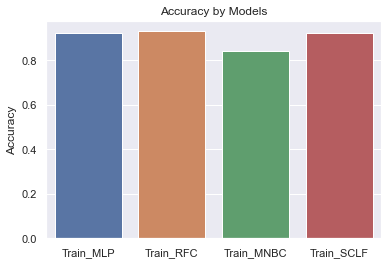

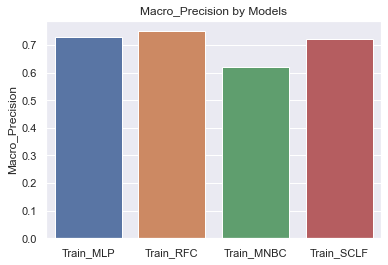

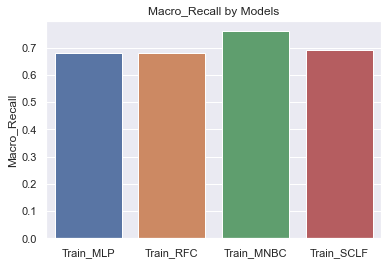

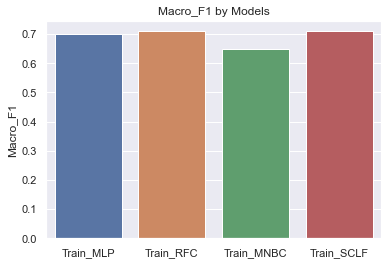

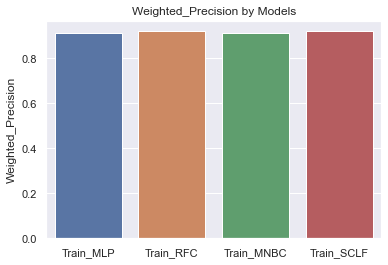

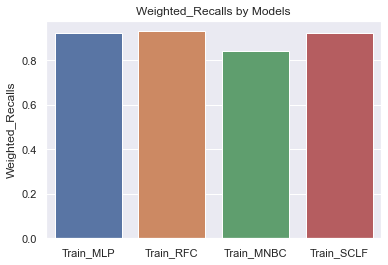

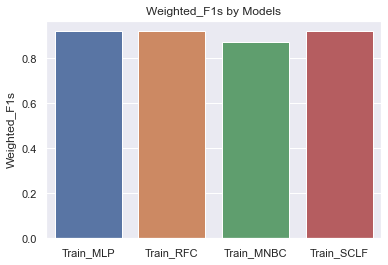

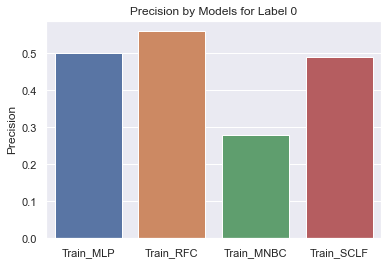

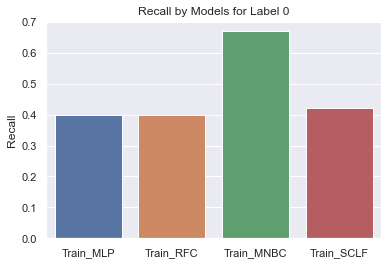

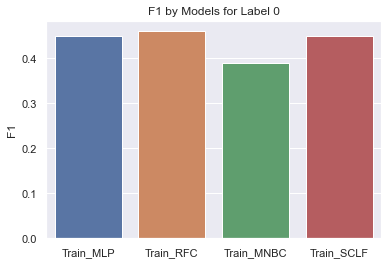

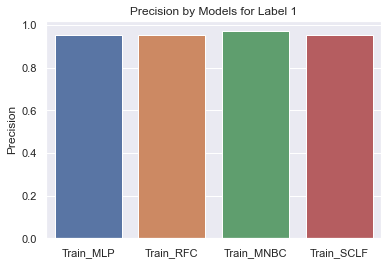

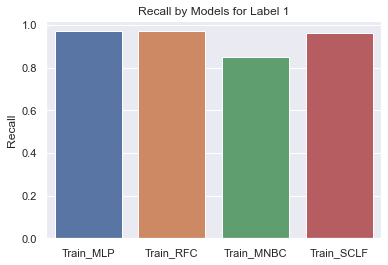

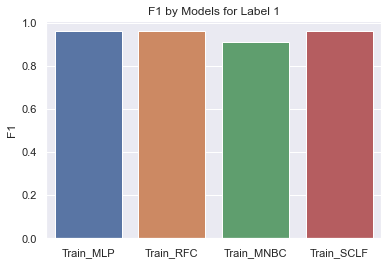

In [40]:
def plotter(df_list):
    for dataframeidx in range(len(df_list)):
        if dataframeidx == 0:
            for metric in df_list[dataframeidx].columns:
                sns.barplot(y=df_list[dataframeidx][str(metric)].astype('float'), x=df_list[0].index).set_title(str(metric) + ' by Models')
                plt.show()
        else: 
            for metric in df_list[dataframeidx].columns:
                sns.barplot(y=df_list[dataframeidx][str(metric)].astype('float'), x=df_list[0].index).set_title(str(metric) + ' by Models ' + 'for Label {}'.format(labels[dataframeidx-1]))
                plt.show()

plotter(classification_reports_train_df)

### Test Set Visual Evaluation

In [41]:
model_names =[]
labels= []
accuracies = []
precisions = []
recalls = []
f1s = []
macro_precisions = []
macro_recalls = []
macro_f1s = []
weighted_precisions = []
weighted_recalls = []
weighted_f1s = []

classification_report_to_df(classification_report(y_pred=mlp_test_predictions,  y_true= y_test.to_numpy().ravel()), 2, 'Test_MLP')
classification_report_to_df(classification_report(y_pred=rfc_test_predictions, y_true= y_test.to_numpy().ravel()), 2, 'Test_RFC')
classification_report_to_df(classification_report(y_pred=mnbc_test_predictions, y_true= y_test.to_numpy().ravel()), 2, 'Test_MNBC')
classification_reports_test_df = classification_report_to_df(classification_report(y_pred=stacked_test_predictions, y_true= y_test.to_numpy().ravel()), 2, 'Test_SCLF')
printer(classification_reports_test_df)

          Accuracy Macro_Precision Macro_Recall Macro_F1 Weighted_Precision  \
Test_MLP      0.90            0.67         0.69     0.68               0.91   
Test_RFC      0.93            0.74         0.69     0.71               0.92   
Test_MNBC     0.84            0.62         0.76     0.65               0.91   
Test_SCLF     0.91            0.69         0.70     0.69               0.91   

          Weighted_Recalls Weighted_F1s  
Test_MLP              0.90         0.90  
Test_RFC              0.93         0.92  
Test_MNBC             0.84         0.87  
Test_SCLF             0.91         0.91  
          Precision Recall    F1
Test_MLP       0.38   0.45  0.41
Test_RFC       0.52   0.41  0.46
Test_MNBC      0.27   0.67  0.39
Test_SCLF      0.42   0.46  0.44
          Precision Recall    F1
Test_MLP       0.95   0.94  0.95
Test_RFC       0.95   0.97  0.96
Test_MNBC      0.97   0.85  0.91
Test_SCLF      0.95   0.95  0.95


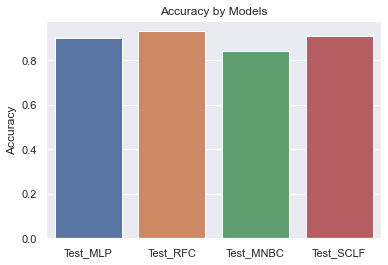

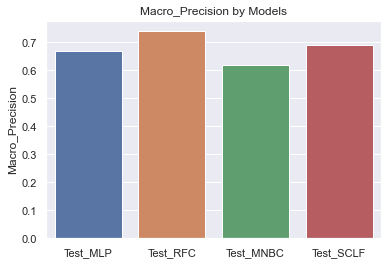

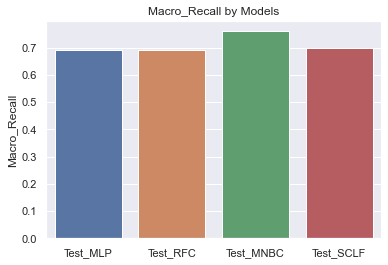

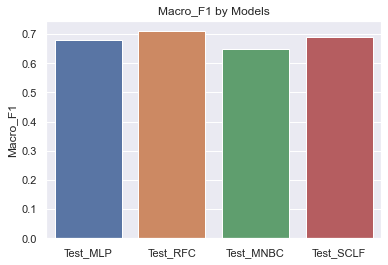

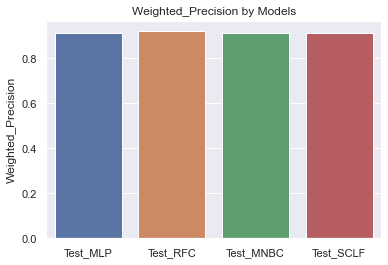

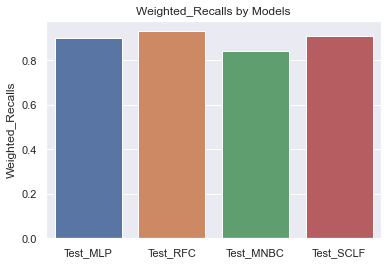

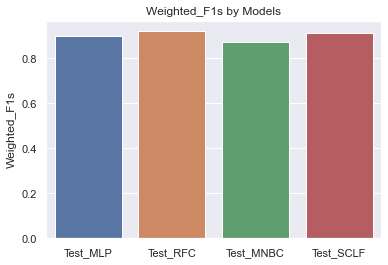

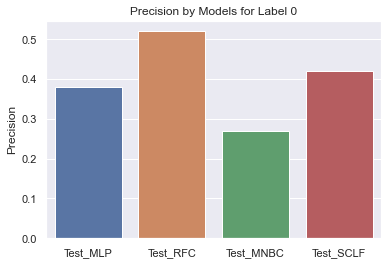

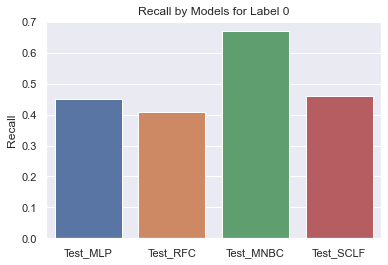

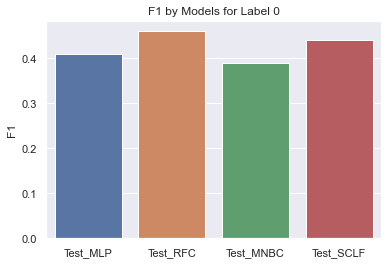

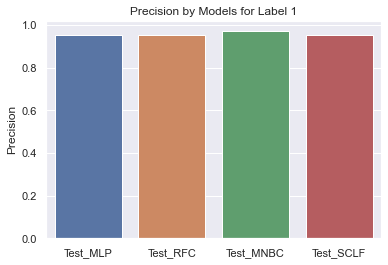

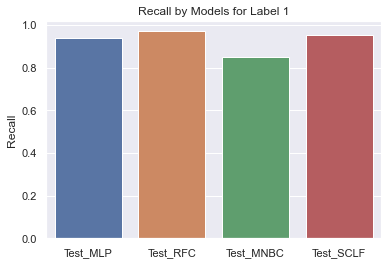

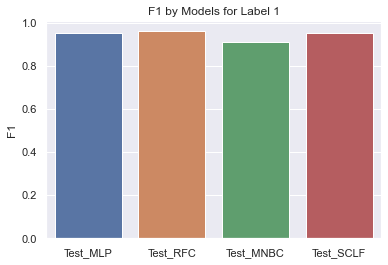

In [42]:

plotter(classification_reports_test_df)